<a href="https://colab.research.google.com/github/oesihyeon/Vote_App_DA/blob/main/final_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, levene, ttest_ind

# ‚ñ∂ Warnings Ï†úÍ±∞
import warnings
warnings.filterwarnings('ignore')
import sys
sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr

# ‚ñ∂ Google drive mount or Ìè¥Îçî ÌÅ¥Î¶≠ ÌõÑ Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Í∞úÎ∞úÌôòÍ≤Ω ÏÑ∏ÌåÖÌïòÍ∏∞

# ‚ñ∂ ÌïúÍ∏Ä Ìè∞Ìä∏ Îã§Ïö¥Î°úÎìú
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# ‚ñ∂ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÌïòÍ∏∞
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ‚ñ∂ Warnings Ï†úÍ±∞
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls /content/drive/MyDrive/'Colab Notebooks'/final_project

accounts_attendance.csv		 accounts_school.csv		  hackle_events.csv
accounts_blockrecord.csv	 accounts_timelinereport.csv	  hackle_properties.csv
accounts_failpaymenthistory.csv  accounts_user_contacts.csv	  polls_question.csv
accounts_friendrequest.csv	 accounts_user.csv		  polls_questionpiece.csv
accounts_group.csv		 accounts_userquestionrecord.csv  polls_questionreport.csv
accounts_nearbyschool.csv	 accounts_userwithdraw.csv	  polls_questionset.csv
accounts_paymenthistory.csv	 device_properties.csv		  polls_usercandidate.csv
accounts_pointhistory.csv	 event_receipts.csv		  user_properties.csv


In [ ]:
import pandas as pd

# Google Drive ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')

# Í∏∞Î≥∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
base_path = '/content/drive/MyDrive/Colab Notebooks/final_project/'

# Í∞Å CSV ÌååÏùºÏùÑ ÏùΩÏñ¥ÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
accounts_attendance = pd.read_csv(base_path + 'accounts_attendance.csv')
accounts_blockrecord = pd.read_csv(base_path + 'accounts_blockrecord.csv')
accounts_failpaymenthistory = pd.read_csv(base_path + 'accounts_failpaymenthistory.csv')
accounts_friendrequest = pd.read_csv(base_path + 'accounts_friendrequest.csv')
accounts_group = pd.read_csv(base_path + 'accounts_group.csv')
accounts_nearbyschool = pd.read_csv(base_path + 'accounts_nearbyschool.csv')
accounts_paymenthistory = pd.read_csv(base_path + 'accounts_paymenthistory.csv')
accounts_pointhistory = pd.read_csv(base_path + 'accounts_pointhistory.csv')
accounts_school = pd.read_csv(base_path + 'accounts_school.csv')
accounts_timelinereport = pd.read_csv(base_path + 'accounts_timelinereport.csv')
accounts_user_contacts = pd.read_csv(base_path + 'accounts_user_contacts.csv')
accounts_user = pd.read_csv(base_path + 'accounts_user.csv')
accounts_userquestionrecord = pd.read_csv(base_path + 'accounts_userquestionrecord.csv')
accounts_userwithdraw = pd.read_csv(base_path + 'accounts_userwithdraw.csv')
device_properties = pd.read_csv(base_path + 'device_properties.csv')
event_receipts = pd.read_csv(base_path + 'event_receipts.csv')
hackle_events = pd.read_csv(base_path + 'hackle_events.csv')
hackle_properties = pd.read_csv(base_path + 'hackle_properties.csv')
polls_question = pd.read_csv(base_path + 'polls_question.csv')
polls_questionpiece = pd.read_csv(base_path + 'polls_questionpiece.csv')
polls_questionreport = pd.read_csv(base_path + 'polls_questionreport.csv')
polls_questionset = pd.read_csv(base_path + 'polls_questionset.csv')
polls_usercandidate = pd.read_csv(base_path + 'polls_usercandidate.csv')
user_properties = pd.read_csv(base_path + 'user_properties.csv')

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ (Ïòà: Ï≤´ Î≤àÏß∏ 5Í∞ú Ìñâ Ï∂úÎ†•)
print(accounts_attendance.head())
print(accounts_blockrecord.head())
print(polls_question.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id                               attendance_date_list  user_id
0   1  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1446852
1   2  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1359398
2   3  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1501542
3   4  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1507767
4   5  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1287453
   id              reason           created_at  block_user_id  user_id
0   1               Í∑∏ÎÉ•...  2023-05-04 23:01:53         867483   878476
1   2         ÏπúÍµ¨ ÏÇ¨Ïù¥Í∞Ä Ïñ¥ÏÉâÌï¥Ïßê  2023-05-05 01:17:08         867190   867564
2   3  ÎÇòÎûë Í¥ÄÎ†® ÏóÜÎäî ÏßàÎ¨∏ÏùÑ ÏûêÍæ∏ Î≥¥ÎÉÑ  2023-05-05 01:50:55         875110   875261
3   6               Í∑∏ÎÉ•...  2023-05-05 05:21:52         883696   883511
4   7               Í∑∏ÎÉ•...  2023-05-05 06:40:34         871349   

In [ ]:
accounts_user = pd.read_csv(base_path + 'accounts_user.csv')

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ (Ïòà: Ï≤´ Î≤àÏß∏ 5Í∞ú Ìñâ Ï∂úÎ†•)
print(accounts_attendance.head())
print(accounts_blockrecord.head())
print(polls_question.head())


   id                               attendance_date_list  user_id
0   1  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1446852
1   2  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1359398
2   3  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1501542
3   4  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1507767
4   5  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1287453
   id              reason           created_at  block_user_id  user_id
0   1               Í∑∏ÎÉ•...  2023-05-04 23:01:53         867483   878476
1   2         ÏπúÍµ¨ ÏÇ¨Ïù¥Í∞Ä Ïñ¥ÏÉâÌï¥Ïßê  2023-05-05 01:17:08         867190   867564
2   3  ÎÇòÎûë Í¥ÄÎ†® ÏóÜÎäî ÏßàÎ¨∏ÏùÑ ÏûêÍæ∏ Î≥¥ÎÉÑ  2023-05-05 01:50:55         875110   875261
3   6               Í∑∏ÎÉ•...  2023-05-05 05:21:52         883696   883511
4   7               Í∑∏ÎÉ•...  2023-05-05 06:40:34         871349   870177
    id                 question_text           created_at
0   99            Í∞ÄÏû• Ïã†ÎπÑÌïú Îß§Î†•Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÄ?  

### Í∞êÏÑ± Î∂ÑÏÑù

In [ ]:
import pandas as pd

# Assuming polls_questionpiece and polls_question are your DataFrames
merged_df = pd.merge(polls_questionpiece, polls_question, left_on='question_id', right_on='id')

print(merged_df.head())

     id_x  is_voted         created_at_x  question_id  is_skipped  id_y  \
0  998458         1  2023-04-28 12:27:22          252           0   252   
1  998459         1  2023-04-28 12:27:22          244           0   244   
2  998460         1  2023-04-28 12:27:22          183           0   183   
3  998461         1  2023-04-28 12:27:22          101           0   101   
4  998462         1  2023-04-28 12:27:22          209           0   209   

             question_text         created_at_y  
0   ÏÜêÏù¥ Í∞ÄÏû• Ïù¥ÏÅòÍ≤å ÏÉùÍ≤ºÏùÑÍ±∞ Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-04-01 11:09:27  
1    ÎåÄÌïôÍµêÏóêÏÑú ÌïôÏÉùÌöåÏû•Ìï† Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-04-01 11:09:26  
2  ÎÇòÏùò ÏûêÏ°¥Í∞êÏùÑ Í∞ÄÏû• ÎßéÏù¥ ÎÜíÏó¨Ï§¨Îçò ÏÇ¨ÎûåÏùÄ?  2023-04-01 11:09:14  
3                ÎØ∏ÎûòÏùò Ìã±ÌÜ°Ïª§Îäî?  2023-03-31 15:22:54  
4        Ìï≠ÏÉÅ Ï¢ãÏùÄ ÎÉÑÏÉàÍ∞Ä ÎÇòÎäî ÏÇ¨ÎûåÏùÄ?  2023-04-01 11:09:20  


In [ ]:
# is_skippedÍ∞Ä 1Ïù∏ ÏßàÎ¨∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
skipped_questions = polls_questionpiece[polls_questionpiece['is_skipped'] == 1]

# ÏßàÎ¨∏ ÌÖçÏä§Ìä∏ÏôÄ Î≥ëÌï©
skipped_questions_with_text = pd.merge(skipped_questions, polls_question, left_on='question_id', right_on='id')

# Í≤∞Í≥º ÌôïÏù∏
print(skipped_questions_with_text[['question_id', 'question_text', 'is_skipped']].head())
df=skipped_questions_with_text


   question_id            question_text  is_skipped
0          114     ÌôîÎÇòÎ©¥ Í∞ÄÏû• Î¨¥ÏÑúÏö∏ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           1
1          229      ÏÑ†ÏÉùÎãòÎì§ÏóêÍ≤å Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏÇ¨ÎûåÏùÄ?           1
2          119  ÏãúÍ∞Ñ ÏïΩÏÜçÏùÑ Ï†úÏùº Ïûò ÏßÄÌÇ¨Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           1
3          213     Í∞ÄÏû• Ï¢ãÏùÄ Î∂ÄÎ™®Í∞Ä Îê†Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           1
4          286           ÏõÉÏùåÏù¥ Í∞ÄÏû• ÎßéÏùÄ ÏÇ¨ÎûåÏùÄ?           1


#### skipÎêú ÏßàÎ¨∏Îì§Ïóê ÎåÄÌï¥ÏÑú Î∂ÄÏ†ïÏ†ÅÏù∏Í±∞ & Í∏çÏ†ïÏ†ÅÏù∏Í≤É Ï§ë Ïñ¥Îñ§Í≤ÉÏù¥ Îçî ÎßéÏùÄÏßÄ ÌôïÏù∏ÌïòÍ∏∞
+Ï∂îÍ∞Ä Î∂ÑÏÑùÌï† Ïàò ÏûàÎäîÍ±∞ : skippedÎêòÏßÄ ÏïäÏùÄ Í≤∞Í≥ºÏóê ÎåÄÌï¥ÏÑúÎäî Í∏çÎ∂ÄÏ†ï Ï§ë Ïñ¥Îñ§Í≤å ÎßéÏùÄÏßÄ
Í∞ÄÏÑ§ : ÏÇ¨ÎûåÎì§ÏùÄ Í∏çÏ†ïÏ†ÅÏù∏ ÏßàÎ¨∏Ïóê ÎåÄÌï¥ÏÑú Îçî ÎßéÏù¥ ÎãµÎ≥ÄÏùÑ ÌñàÏùÑ Í≤ÉÏù¥Îã§.

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('vader_lexicon')


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# VADER Í∞êÏ†ï Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
sia = SentimentIntensityAnalyzer()

# 'question_text' Ïª¨ÎüºÏóê ÎåÄÌï¥ Í∞êÏ†ï Î∂ÑÏÑù ÏàòÌñâ
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']  # 'compound' Ï†êÏàòÎäî Ï¢ÖÌï©Ï†ÅÏù∏ Í∞êÏ†ï Ï†êÏàò

# 'question_text'Ïóê Í∞êÏ†ï Î∂ÑÏÑù Ï†êÏàò Ï∂îÍ∞Ä
skipped_questions_with_text['sentiment_score'] = skipped_questions_with_text['question_text'].apply(analyze_sentiment)

# Í∞êÏ†ï Ï†êÏàòÏóê Îî∞Îùº Í∏çÏ†ï, Î∂ÄÏ†ï, Ï§ëÎ¶Ω Î∂ÑÎ•ò
def categorize_sentiment(score):
    if score > 0:
        return 'Í∏çÏ†ï'
    elif score < 0:
        return 'Î∂ÄÏ†ï'
    else:
        return 'Ï§ëÎ¶Ω'

# Í∞êÏ†ï Î∂ÑÎ•ò Ïª¨Îüº Ï∂îÍ∞Ä
skipped_questions_with_text['sentiment'] = skipped_questions_with_text['sentiment_score'].apply(categorize_sentiment)

# Í≤∞Í≥º ÌôïÏù∏
print(skipped_questions_with_text[['question_text', 'sentiment']].head())


             question_text sentiment
0     ÌôîÎÇòÎ©¥ Í∞ÄÏû• Î¨¥ÏÑúÏö∏ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?        Ï§ëÎ¶Ω
1      ÏÑ†ÏÉùÎãòÎì§ÏóêÍ≤å Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏÇ¨ÎûåÏùÄ?        Ï§ëÎ¶Ω
2  ÏãúÍ∞Ñ ÏïΩÏÜçÏùÑ Ï†úÏùº Ïûò ÏßÄÌÇ¨Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?        Ï§ëÎ¶Ω
3     Í∞ÄÏû• Ï¢ãÏùÄ Î∂ÄÎ™®Í∞Ä Îê†Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?        Ï§ëÎ¶Ω
4           ÏõÉÏùåÏù¥ Í∞ÄÏû• ÎßéÏùÄ ÏÇ¨ÎûåÏùÄ?        Ï§ëÎ¶Ω


In [ ]:
import pandas as pd
import re
from transformers import pipeline

# ÏÇ¨Ï†Ñ ÌïôÏäµÎêú ÌïúÍµ≠Ïñ¥ Í∞êÏÑ± Î∂ÑÏÑù Î™®Îç∏ Î°úÎìú
sentiment_model = pipeline("sentiment-analysis", model="snunlp/KR-FinBert-SC")

# Í∞êÏÑ± Î∂ÑÏÑù Ìï®Ïàò Ï†ïÏùò
def analyze_sentiment(text, default_label="neutral"):
    try:
        # Îπà ÌÖçÏä§Ìä∏Îäî Í∏∞Î≥∏ Í∞êÏ†ïÏúºÎ°ú Ï≤òÎ¶¨
        if not isinstance(text, str) or text.strip() == "":
            return default_label
        # Í∞êÏÑ± Î∂ÑÏÑù Ïã§Ìñâ
        return sentiment_model(text)[0]['label']
    except Exception as e:
        # ÏòàÏô∏Í∞Ä Î∞úÏÉùÌïòÎ©¥ Í∏∞Î≥∏ Í∞êÏ†ïÏúºÎ°ú Î∞òÌôò
        print(f"Error analyzing text: {text}, Error: {e}")
        return default_label

# 'question_text'ÏóêÏÑú Î¨ºÏùåÌëú Ï†úÍ±∞
df['clean_question'] = df['question_text'].apply(lambda x: re.sub(r'\?$', '', x))

# Í∞Å Î¨∏Ïû•Ïóê ÎåÄÌï¥ Í∞êÏÑ± Î∂ÑÏÑù ÏàòÌñâ
df['sentiment'] = df['clean_question'].apply(analyze_sentiment)

# Í≤∞Í≥º Ï∂úÎ†•
print(df[['question_id', 'clean_question', 'sentiment']])


      question_id                 clean_question sentiment
0             114            ÌôîÎÇòÎ©¥ Í∞ÄÏû• Î¨¥ÏÑúÏö∏ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ   neutral
1             229             ÏÑ†ÏÉùÎãòÎì§ÏóêÍ≤å Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏÇ¨ÎûåÏùÄ   neutral
2             119         ÏãúÍ∞Ñ ÏïΩÏÜçÏùÑ Ï†úÏùº Ïûò ÏßÄÌÇ¨Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ   neutral
3             213            Í∞ÄÏû• Ï¢ãÏùÄ Î∂ÄÎ™®Í∞Ä Îê†Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ   neutral
4             286                  ÏõÉÏùåÏù¥ Í∞ÄÏû• ÎßéÏùÄ ÏÇ¨ÎûåÏùÄ   neutral
...           ...                            ...       ...
1122         3586  ÌÜ°ÏúºÎ°ú ÏûîÎã§Í≥† ÏñòÍ∏∞ÌïòÍ≥† Îã§Î•∏ Í≤ÉÏùÑ Ìï† Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ   neutral
1123         2785                     ÎÖ∏ÎäîÎç∞ ÏßÑÏã¨Ïù∏ ÏÇ¨Îûå   neutral
1124         1420       ÏïÑÏù¥ÎèåÍ≥º ÎπÑÎ∞ÄÏó∞Ïï†Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ   neutral
1125         2568                  Î∞òÏùëÏù¥ Î°úÎ¥á Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ   neutral
1126         4831               ÏÇ∞Î¶¨Ïò§ Ï¢ãÏïÑÌï† Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ   neutral

[1127 rows x 3 

Í∞êÏÑ±Î∂ÑÏÑù Í≤∞Í≥º :  Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú Ïã§Ìå®Ìï® -> Îã§ neutralÎ°ú ÎÇòÏôÄÏÑú ÏïåÏàòÍ∞Ä ÏóÜÏùå..

### school_merge_dataÎßåÎì§Í∏∞

In [ ]:
accounts_group.head()

id  grade  class_num  school_id
0   1      1          1          1
1   8      3          2          1
2   9      3          3          1
3  10      2          2          1
4  11      2          3          1

In [ ]:
accounts_nearbyschool.head()

id  distance  nearby_school_id  school_id
0  119021  0.004564                 6          7
1  119022  0.010787                13          7
2  119023  0.012928                20          7
3  119024  0.013590                 4          7
4  119025  0.014122                24          7

In [ ]:
accounts_school.head()
# id= school_idÏù∏Í±∏Î°ú Î≥¥ÏûÑ

id   address  student_count school_type
0   4  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            239           H
1   5  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            160           M
2   6  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            200           H
3   7  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            114           H
4   8  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            139           M

In [ ]:
accounts_user.head()

id  is_superuser  is_staff gender  point  \
0  831956             1         1    NaN    600   
1  831962             0         0      F   2248   
2  832151             0         0      M   1519   
3  832340             0         0      F     57   
4  832520             0         0      M   1039   

                                      friend_id_list  is_push_on  \
0  [1292473, 913158, 1488461, 1064695, 1043565, 1...           0   
1  [833025, 832642, 982531, 879496, 838541, 83752...           1   
2  [838785, 982531, 882567, 879496, 838541, 83649...           0   
3  [841345, 982531, 838785, 963714, 882567, 83252...           1   
4  [874050, 849763, 874212, 844297, 838541, 84004...           0   

            created_at block_user_id_list hide_user_id_list ban_status  \
0  2023-03-29 03:44:14                 []                []          N   
1  2023-03-29 05:18:56                 []                []          N   
2  2023-03-29 12:56:34                 []                []          N   
3  2023-03-29 12:56:35                 []                []          N   
4  2023-03-29 12:56:35                 []                []          N   

   report_count  alarm_count  pending_chat  pending_votes  group_id  
0             0            0             0              0       NaN  
1           253        40878          5499            110      12.0  
2             0           37             0             47       1.0  
3             0           19             0             21       1.0  
4             0           29             0             15      12.0

- ÎÇ†ÏßúÏóê Îî∞Î•∏ createdÎêú Ïù¥Ïö©ÏûêÏùò Ïàò ÏãúÍ∞ÅÌôî
- Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏùò gender ÎπÑÏú®


mergeÌï¥Ï£ºÍ∏∞

In [ ]:
# school_idÏôÄ id Í∞íÏù¥ ÏùºÏπòÌïòÎäîÏßÄ ÌôïÏù∏
matching_schools = accounts_group[accounts_group['school_id'].isin(accounts_school['id'])]
print(matching_schools[['school_id', 'grade', 'class_num']].head())

# ÌòïÏãù ÌôïÏù∏ (Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò ÌõÑ ÎπÑÍµê)
accounts_group['school_id'] = accounts_group['school_id'].astype(int)
accounts_school['id'] = accounts_school['id'].astype(int)

# Îã§Ïãú Î≥ëÌï© ÏãúÎèÑ
merged_group_school = pd.merge(
    accounts_group,
    accounts_school,
    left_on='school_id',
    right_on='id',
    how='left'
)

# Î≥ëÌï© Í≤∞Í≥º ÌôïÏù∏
print(merged_group_school.head())


    school_id  grade  class_num
6          30      1          1
7        5925      1          1
8        2363      2          2
9        2380      1          1
10        281      2          3
   id_x  grade  class_num  school_id  id_y address  student_count school_type
0     1      1          1          1   NaN     NaN            NaN         NaN
1     8      3          2          1   NaN     NaN            NaN         NaN
2     9      3          3          1   NaN     NaN            NaN         NaN
3    10      2          2          1   NaN     NaN            NaN         NaN
4    11      2          3          1   NaN     NaN            NaN         NaN


Î≠îÍ∞Ä nullÍ∞íÏù¥ ÎßéÏïÑ Î≥¥Ïù¥ÎäîÎç∞ Ï†úÎåÄÎ°ú Î≥ëÌï©Ïù¥ ÏùòÎ¨∏Ïù¥ Îì¨
-> nullÍ∞íÏùò ÎπÑÏú®ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í∏∞Î°úÌï®.

In [ ]:
# Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú null Í∞í Í∞úÏàò Î∞è ÎπÑÏú® Í≥ÑÏÇ∞
null_count = merged_group_school.isnull().sum()  # Í∞Å Ïª¨ÎüºÏùò null Í∞úÏàò
null_percentage = (null_count / len(merged_group_school)) * 100  # Í∞Å Ïª¨ÎüºÏùò null ÎπÑÏú®

# Í≤∞Í≥º Ï∂úÎ†•
null_summary = pd.DataFrame({
    'null_count': null_count,
    'null_percentage': null_percentage
})

# Í≤∞Í≥º ÌôïÏù∏
print(null_summary)


               null_count  null_percentage
id_x                    0         0.000000
grade                   0         0.000000
class_num               0         0.000000
school_id               0         0.000000
id_y                   26         0.030764
address                26         0.030764
student_count          26         0.030764
school_type            26         0.030764


In [ ]:
# 1. accounts_userÏôÄ merged_group_school Î≥ëÌï©
final_merged_with_user = pd.merge(
    accounts_user,
    merged_group_school,
    left_on='group_id',  # accounts_userÏùò group_id
    right_on='id_x',     # merged_group_schoolÏùò id_x
    how='left'           # Ïñ¥ÎñªÍ≤å Î≥ëÌï©Ìï†ÏßÄ ÏÑ†ÌÉù (left join)
)

# 2. Î≥ëÌï© Í≤∞Í≥º ÌôïÏù∏
print(final_merged_with_user[['id', 'group_id', 'school_id', 'grade', 'class_num', 'address', 'student_count', 'school_type']].head())


       id  group_id  school_id  grade  class_num address  student_count  \
0  831956       NaN        NaN    NaN        NaN     NaN            NaN   
1  831962      12.0        1.0    2.0        1.0     NaN            NaN   
2  832151       1.0        1.0    1.0        1.0     NaN            NaN   
3  832340       1.0        1.0    1.0        1.0     NaN            NaN   
4  832520      12.0        1.0    2.0        1.0     NaN            NaN   

  school_type  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
# null Í∞íÏùò ÏàòÏôÄ ÎπÑÏú® Í≥ÑÏÇ∞
null_counts = final_merged_with_user.isnull().sum()
null_percentages = (null_counts / len(final_merged_with_user)) * 100

# null Í∞íÏùò ÏàòÏôÄ ÎπÑÏú®ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
null_summary = pd.DataFrame({
    'null_count': null_counts,
    'null_percentage': null_percentages
})

# Í≤∞Í≥º Ï∂úÎ†•
print(null_summary)


                    null_count  null_percentage
id                           0         0.000000
is_superuser                 0         0.000000
is_staff                     0         0.000000
gender                       2         0.000295
point                        0         0.000000
friend_id_list               0         0.000000
is_push_on                   0         0.000000
created_at                   0         0.000000
block_user_id_list           0         0.000000
hide_user_id_list            0         0.000000
ban_status                   0         0.000000
report_count                 0         0.000000
alarm_count                  0         0.000000
pending_chat                 0         0.000000
pending_votes                0         0.000000
group_id                     3         0.000443
id_x                         3         0.000443
grade                        3         0.000443
class_num                    3         0.000443
school_id                    3         0

In [ ]:
# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
final_merged_with_user.to_csv('user_school_data.csv', index=False)

In [ ]:
user_school_data= pd.read_csv('/content/school_user_data.csv')

## mergeÎêú Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÏÑù ÏßÑÌñâ

In [ ]:
print(user_school_data.describe())  # ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïùò ÏöîÏïΩ ÌÜµÍ≥Ñ
print(user_school_data['gender'].value_counts())  # ÏÑ±Î≥Ñ Î∂ÑÌè¨
print(user_school_data['school_type'].value_counts())  # ÌïôÍµê ÌÉÄÏûÖ Î∂ÑÌè¨


                 id   is_superuser       is_staff         point  \
count  6.770850e+05  677085.000000  677085.000000  6.770850e+05   
mean   1.212969e+06       0.000003       0.000004  3.039145e+03   
std    2.138971e+05       0.001719       0.002105  1.076020e+06   
min    8.319560e+05       0.000000       0.000000  0.000000e+00   
25%    1.028075e+06       0.000000       0.000000  4.000000e+02   
50%    1.211729e+06       0.000000       0.000000  9.650000e+02   
75%    1.397906e+06       0.000000       0.000000  2.183000e+03   
max    1.583733e+06       1.000000       1.000000  8.850000e+08   

          is_push_on   report_count    alarm_count   pending_chat  \
count  677085.000000  677085.000000  677085.000000  677085.000000   
mean        0.843098       0.037291       0.946646       0.098469   
std         0.363709       0.588105      56.114858      11.087769   
min         0.000000       0.000000       0.000000      -1.000000   
25%         1.000000       0.000000       0.000000 

gender
- F    396665
- M    280418

school_type
- H    376389
- M    300598
-------------
ÏÇ¨Ïö©Ïûê Ï§ë Ïó¨ÏÑ±Ïùò ÎπÑÏú®Ïù¥ ÏïΩÍ∞Ñ Îçî ÎÜíÏùÄÍ≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏùå.
ÎòêÌïú Í≥†Îì±ÌïôÍµê & Ï§ëÌïôÍµêÏùò ÎπÑÏú®ÏóêÏÑú Í≥†Îì±ÌïôÏÉù Ïú†Ï†ÄÍ∞Ä ÏïΩÍ∞Ñ Îçî ÎßéÏïòÏùå.

### ÌïôÏÉùÏùÑ ÏÑ±Î≥Ñ, Í≥†Îì±ÌïôÍµê-Ï§ëÌïôÍµêÎ°ú Î≤îÏ£ºÌôîÌï¥ÏÑú Í∞ÅÍ∞ÅÏùò pointÎ•º ÏÇ¥Ìé¥Î≥∏ Í≤∞Í≥º

<Axes: xlabel='gender', ylabel='point'>

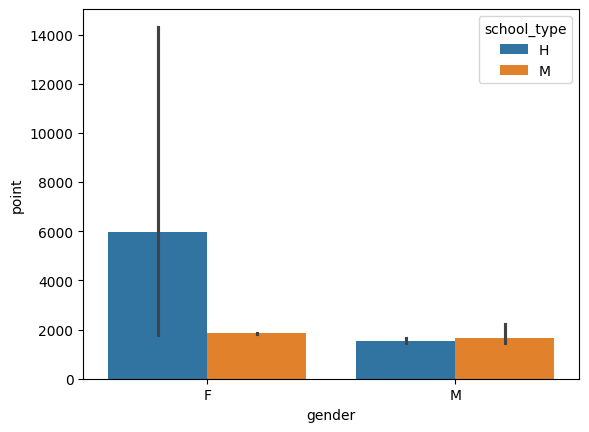

In [ ]:
sns.barplot(x='gender', y='point', hue='school_type', data=user_school_data)


ÌïôÏÉùÏùÑ ÏÑ±Î≥Ñ, Í≥†Îì±ÌïôÍµê-Ï§ëÌïôÍµêÎ°ú Î≤îÏ£ºÌôîÌï¥ÏÑú Í∞ÅÍ∞ÅÏùò pointÎ•º ÏÇ¥Ìé¥Î≥∏ Í≤∞Í≥º

->  **Í≥†Îì±ÌïôÍµê Ïó¨ÌïôÏÉùÏùò Ìè¨Ïù∏Ìä∏Í∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÏùÄÍ≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§. ***

point: Ìè¨Ïù∏Ìä∏ ÎùºÍ≥† Ïª¨Îüº ÏÑ§Î™ÖÏóê ÏûëÏÑ±ÎêòÏñ¥ÏûàÎäîÎç∞ Ïù¥Í≤å Í≥ºÍ∏àÏùÑ Ìï¥ÏÑú ÏñªÏùÑ Ïàò ÏûàÎäî ÏùºÏ¢ÖÏùò Ï∫êÏãú?Í∞ôÏùÄÍ±∞ÏùºÍπå?

### Ìè¨Ïù∏Ìä∏Ïóê ÎåÄÌï¥ÏÑú Ìï† Ïàò ÏûàÎäî Í∞ÄÏÑ§ & Î∂ÑÏÑù
Í∞ÄÏÑ§ : ÏÇ¨Ïö©ÏûêÎì§Ïùò ÌïôÍµêÏóê ÏÇ¨ÎûåÏù¥ ÎßéÏùÑ ÏàòÎ°ù Í∑∏Î£πÏù¥ ÌôúÏÑ±ÌôîÎêòÏñ¥ Îçî ÎßéÏùÄ Í≥ºÍ∏àÏùÑ ÌñàÏùÑÍ±∞ÏûÑ.
Î∂ÑÏÑù Î∞©Î≤ï :
1. ÌïôÍµê ÌèâÍ∑† ÌïôÏÉù Ïàò Í≥ÑÏÇ∞
2. ÌèâÍ∑† Ïù¥ÏÉÅÏù∏ Í∑∏Î£π & Í∑∏Î†áÏßÄ ÏïäÏùÄ ÌïôÍµê Í∑∏Î£πÏùÑ ÎÇòÎàÑÏñ¥ Í≥ºÍ∏àÏùÑ ÏñºÎßàÎÇò ÌñàÎäîÏßÄ ÌôïÏù∏ -> ÏãúÍ∞ÅÌôî  

In [ ]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
data = user_school_data[['school_id', 'student_count', 'point']].dropna()

# ÌïôÍµêÎ≥Ñ ÌèâÍ∑† ÌïôÏÉù Ïàò Í≥ÑÏÇ∞
school_avg_students = data.groupby('school_id')['student_count'].mean()

# Ï†ÑÏ≤¥ ÌèâÍ∑† ÌïôÏÉù Ïàò Í≥ÑÏÇ∞
overall_avg_students = school_avg_students.mean()

# ÌèâÍ∑† Ïù¥ÏÉÅ/ÎØ∏Îßå Í∑∏Î£π ÏÉùÏÑ±
data['student_group'] = data['student_count'].apply(
    lambda x: 'High Population' if x >= overall_avg_students else 'Low Population'
)

# Í∞Å ÌïôÍµêÎ≥Ñ ÌèâÍ∑† Ìè¨Ïù∏Ìä∏ Í≥ÑÏÇ∞
school_avg_points = data.groupby('school_id')['point'].mean().reset_index()
data = data.merge(school_avg_points, on='school_id', suffixes=('', '_avg'))


In [ ]:
# Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† Ìè¨Ïù∏Ìä∏ Í≥ÑÏÇ∞
group_point_stats = data.groupby('student_group')['point_avg'].agg(['mean', 'count']).reset_index()
group_point_stats.rename(columns={'mean': 'average_points'}, inplace=True)

print(group_point_stats)


     student_group  average_points   count
0  High Population     3413.965426  541710
1   Low Population     1458.708790  135277


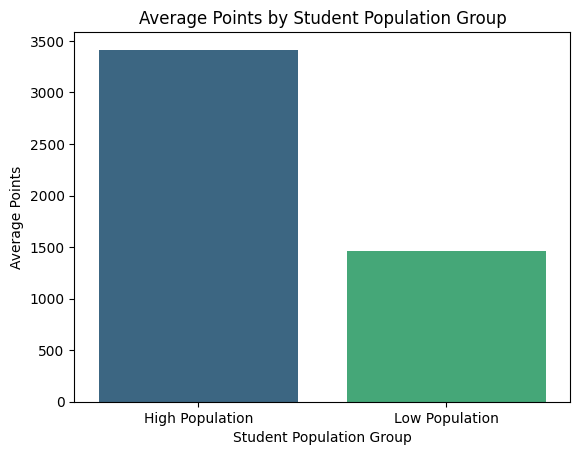

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÌèâÍ∑† Ìè¨Ïù∏Ìä∏ ÏãúÍ∞ÅÌôî
sns.barplot(x='student_group', y='average_points', data=group_point_stats, palette='viridis')
plt.title('Average Points by Student Population Group')
plt.xlabel('Student Population Group')
plt.ylabel('Average Points')
plt.show()


Í≤∞Í≥º : ÌôïÏù∏ Í≤∞Í≥º Ïã§Ï†úÎ°ú ÌèâÍ∑† Ïù¥Ïö©ÏûêÍ∞Ä ÎßéÏùÄ Í∑∏Î£πÏù¥ ÌèâÍ∑†Ï†ÅÏúºÎ°ú Îçî ÎßéÏù¥ Í≥ºÍ∏àÏùÑ ÌïòÎäîÍ≤ÉÏúºÎ°ú Î≥¥ÏòÄÎã§.

Í∑∏Î†áÎã§Î©¥ Ïù¥Ïö©Í≥†Í∞ùÏù¥ Ï†ÅÏùÄ Í≤ΩÏö∞Ïóê ÎåÄÌï¥ÏÑú Ïñ¥Îñ§ Î∞©ÏãùÏúºÎ°ú .. Ìï¥ÏïºÏßÄÎßå ÏÇ¨Ïö©ÏûêÎì§Ïùò Í≥ºÍ∏àÏùÑ Ïú†ÎèÑÌï† Ïàò ÏûàÏùÑÍπå

In [ ]:
polls_questionset.head()

id                             question_piece_id_list  \
0  99817  [998458, 998459, 998460, 998461, 998462, 99846...   
1  99830  [998588, 998589, 998590, 998591, 998592, 99859...   
2  99840  [998689, 998691, 998693, 998695, 998697, 99869...   
3  99841  [998688, 998690, 998692, 998694, 998696, 99869...   
4  99848  [998768, 998769, 998770, 998771, 998772, 99877...   

          opening_time status           created_at  user_id  
0  2023-04-28 12:27:22      F  2023-04-28 12:27:23   849436  
1  2023-04-28 12:28:07      F  2023-04-28 12:28:07   849438  
2  2023-04-28 12:28:38      F  2023-04-28 12:28:38   847375  
3  2023-04-28 12:28:38      F  2023-04-28 12:28:38   849446  
4  2023-04-28 12:28:57      F  2023-04-28 12:28:57   849477

In [ ]:
polls_questionpiece.head()

id  is_voted           created_at  question_id  is_skipped
0  998458         1  2023-04-28 12:27:22          252           0
1  998459         1  2023-04-28 12:27:22          244           0
2  998460         1  2023-04-28 12:27:22          183           0
3  998461         1  2023-04-28 12:27:22          101           0
4  998462         1  2023-04-28 12:27:22          209           0

polls_questionset Ïóê ÏûàÎäî question_piece_id_list ÏïàÏùò Í∞í = polls_questionpieceÏïàÏóê ÏûàÎäî idÍ∞í

In [ ]:
target_ids = [998588, 998589, 998590, 998591, 998592, 99859]

filtered_questions = polls_questionpiece[polls_questionpiece['id'].isin(target_ids)]
print(filtered_questions)

        id  is_voted           created_at  question_id  is_skipped
10  998588         1  2023-04-28 12:28:07          237           0
11  998589         1  2023-04-28 12:28:07          138           0
12  998590         1  2023-04-28 12:28:07          184           0
13  998591         1  2023-04-28 12:28:07          157           0
14  998592         1  2023-04-28 12:28:07          276           0


In [ ]:
polls_question.head()

id                 question_text           created_at
0   99            Í∞ÄÏû• Ïã†ÎπÑÌïú Îß§Î†•Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:22:53
1  100  Ïù¥ ÏÇ¨ÎûåÏúºÎ°ú Ìïú Î≤à ÏÇ¥ÏïÑÎ≥¥Í≥† Ïã∂Îã§" ÌïòÎäî ÏÇ¨ÎûåÏùÄ?"  2023-03-31 15:22:53
2  101                     ÎØ∏ÎûòÏùò Ìã±ÌÜ°Ïª§Îäî?  2023-03-31 15:22:54
3  102               Ïó¨Í∏∞ÏÑú Ï†úÏùº ÌäπÏù¥Ìïú ÏπúÍµ¨Îäî?  2023-03-31 15:22:54
4  103               Í∞ÄÏû• ÏßÄÏºúÏ£ºÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:22:55

In [ ]:
target_ids = [237,138,184,157,276]
filtered_questions = polls_question[polls_question['id'].isin(target_ids)]
print(filtered_questions)

      id                  question_text           created_at
39   138      Ï≤´ ÌÇ§Ïä§Î•º Í∞ÄÏû• Î®ºÏ†Ä Ìï¥Î¥§ÏùÑ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:23:13
58   157         ÎÇòÏóêÍ≤å Ìï≠ÏÉÅ ÏùëÏõêÍ≥º Ïö©Í∏∞Î•º Ï£ºÎäî ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:23:22
85   184              Îû©ÏùÑ Ï†úÏùº ÏûòÌï†Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-04-01 11:09:14
138  237  Ïù¥Î≥Ñ ÌõÑ ÏûêÍ∏∞Í∞Ä Î®ºÏ†Ä ÌôîÌï¥Î©îÏãúÏßÄ Î≥¥ÎÇº Í≤É Í∞ôÏùÄ ÏÇ¨Îûå?  2023-04-01 11:09:25
177  276     10ÎÖÑ ÌõÑ ÎØ∏ÎûòÏóê Í∞ôÏù¥ Ïó¨ÌñâÍ∞ÄÎ≥¥Í≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-04-01 11:09:33


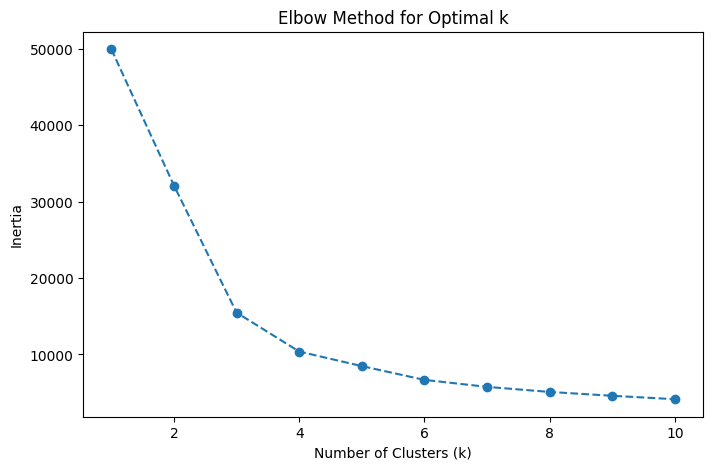

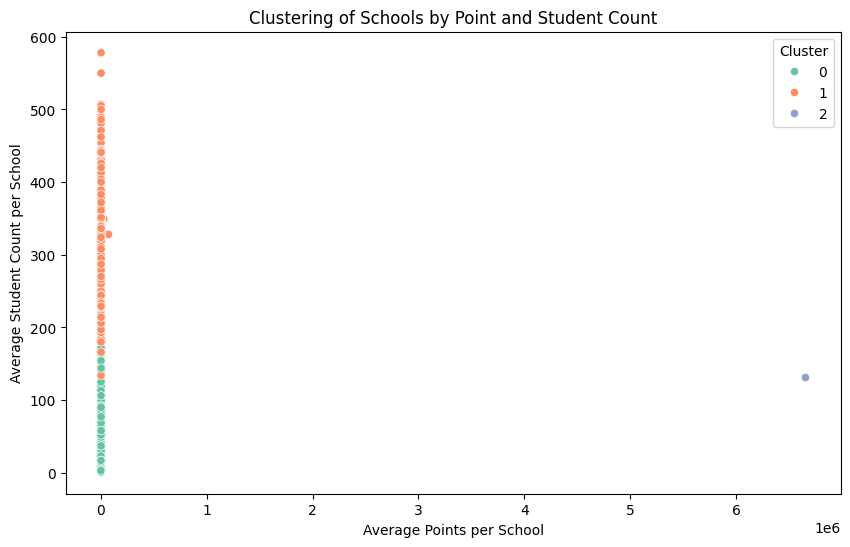

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# school_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ ÏöîÏïΩ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
school_stats = user_school_data.groupby('school_id').agg({
    'point': ['mean', 'sum', 'std'],
    'student_count': ['mean', 'sum'],
    'class_num': ['mean', 'sum'],
    'pending_votes': ['mean', 'sum']
}).reset_index()

# Îã§Ï§ë Ïª¨ÎüºÎ™ÖÏùÑ Îã®Ïùº Î†àÎ≤®Î°ú Î≥ÄÌôò
school_stats.columns = ['_'.join(col).strip() for col in school_stats.columns.values]

# Íµ∞ÏßëÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = school_stats.drop(columns=['school_id_'])

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
X.fillna(0, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÌÉêÏÉâ (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ (k=3Î°ú ÏòàÏãú)
kmeans = KMeans(n_clusters=3, random_state=42)
school_stats['cluster'] = kmeans.fit_predict(X_scaled)

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ± ÌôïÏù∏
cluster_summary = school_stats.groupby('cluster').mean()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏãúÍ∞ÅÌôî (Ïòà: point_mean vs. student_count_mean)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=school_stats, x='point_mean', y='student_count_mean', hue='cluster', palette='Set2')
plt.title('Clustering of Schools by Point and Student Count')
plt.xlabel('Average Points per School')
plt.ylabel('Average Student Count per School')
plt.legend(title='Cluster')
plt.show()


## Í≥†Í∞ù ÌôúÏÑ±Ìôî EDA

In [ ]:

# Google Drive ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')

# Í∏∞Î≥∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
base_path = '/content/drive/MyDrive/Colab Notebooks/final_project/'

# Í∞Å CSV ÌååÏùºÏùÑ ÏùΩÏñ¥ÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
accounts_attendance = pd.read_csv(base_path + 'accounts_attendance.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
accounts_attendance.head()

id                               attendance_date_list  user_id
0   1  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1446852
1   2  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1359398
2   3  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1501542
3   4  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1507767
4   5  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1287453

In [ ]:
import pandas as pd
import numpy as np

# Ï∂úÏÑù ÎÇ†Ïßú Î¶¨Ïä§Ìä∏Î•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
def parse_dates(date_list):
    # Îπà Î¶¨Ïä§Ìä∏ Ï≤òÎ¶¨
    if isinstance(date_list, str):
        try:
            # ÎÇ†Ïßú ÌòïÏãùÏù¥ ÏûòÎ™ªÎêú Í≤ΩÏö∞ ÏòàÏô∏ Ï≤òÎ¶¨
            dates = [pd.to_datetime(date.strip()) for date in date_list.replace("'", "").replace("[", "").replace("]", "").split(',')]
            return dates
        except Exception as e:
            print(f"Error parsing dates: {e}")
            return []
    return []

# Ï∂úÏÑù ÏßÄÌëú Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_attendance_metrics(dates):
    if len(dates) == 0:
        return 0, 0, 0  # Ï¥ù Ï∂úÏÑùÏùº, ÏµúÎåÄ Ïó∞ÏÜç Ï∂úÏÑùÏùº, Ï£ºÍ∞Ñ Ï∂úÏÑùÎ•†

    dates = sorted(dates)
    total_attendance = len(dates)
    max_streak = 1
    current_streak = 1
    weekly_attendance = {}  # {week_number: Ï∂úÏÑù ÏùºÏàò}

    for i in range(1, len(dates)):
        delta = (dates[i] - dates[i - 1]).days

        # Ïó∞ÏÜç Ï∂úÏÑù Í≥ÑÏÇ∞
        if delta == 1:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 1

        # Ï£ºÍ∞Ñ Ï∂úÏÑù Í≥ÑÏÇ∞
        week_number = dates[i].isocalendar()[1]  # Ï£º Î≤àÌò∏
        weekly_attendance[week_number] = weekly_attendance.get(week_number, 0) + 1

    average_weekly_attendance = np.mean(list(weekly_attendance.values()))
    return total_attendance, max_streak, average_weekly_attendance


# Ï∂úÏÑù ÎÇ†Ïßú Î¶¨Ïä§Ìä∏Î•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(parse_dates)

# Ïú†Ï†ÄÎ≥Ñ Ï∂úÏÑù ÏßÄÌëú Í≥ÑÏÇ∞
accounts_attendance[['total_days', 'max_streak', 'avg_weekly_attendance']] = accounts_attendance[
    'attendance_date_list'
].apply(lambda x: pd.Series(calculate_attendance_metrics(x)))

print(accounts_attendance)


            id                               attendance_date_list  user_id  \
0            1  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1446852   
1            2  [2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...  1359398   
2            3  [2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...  1501542   
3            4  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1507767   
4            5  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1287453   
...        ...                                                ...      ...   
349632  360501                                              [NaT]   897005   
349633  360502                              [2024-05-09 00:00:00]  1407059   
349634  360503                              [2024-05-09 00:00:00]  1583727   
349635  360504                              [2024-05-09 00:00:00]  1392372   
349636  360505                              [2024-05-09 00:00:00]  1583730   

        total_days  max_streak  avg_weekly_attendance  
0      

ÏöîÏùºÎ≥Ñ Ï∂úÏÑù Ìå®ÌÑ¥ Î∂ÑÏÑù

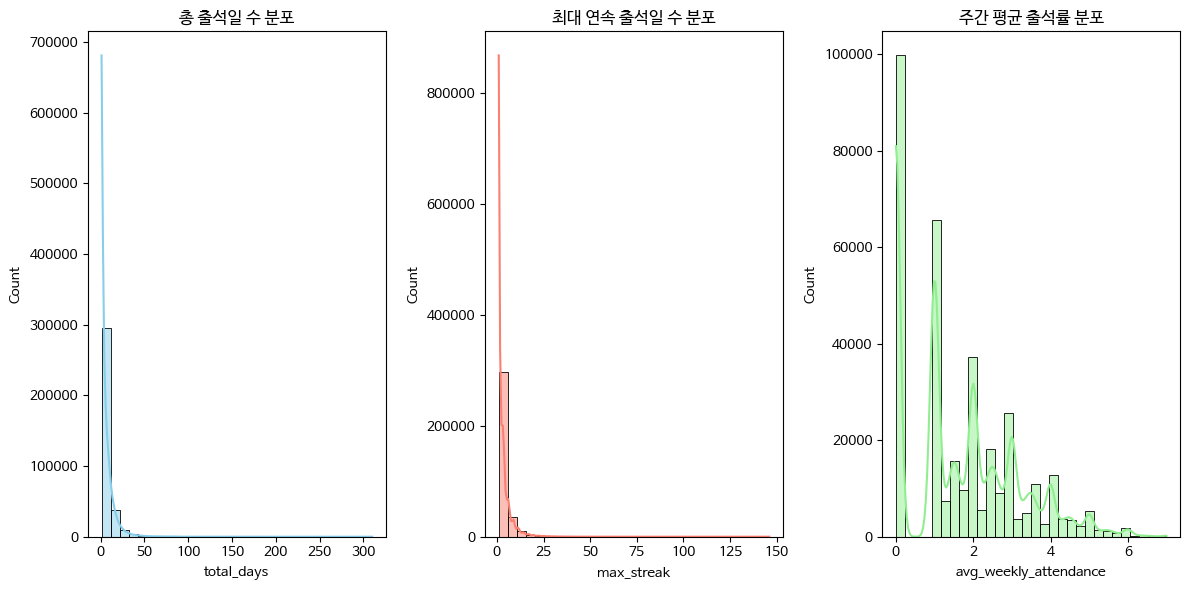

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# NaN Í∞í Ï≤òÎ¶¨ (NaNÏùÑ 0ÏúºÎ°ú ÎåÄÏ≤¥)
accounts_attendance['avg_weekly_attendance'].fillna(0, inplace=True)

# Ï†ÑÏ≤¥ Ïú†Ï†ÄÏùò Ï∂úÏÑù ÏßÄÌëú Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12, 6))

# 'total_days' Î∂ÑÌè¨
plt.subplot(1, 3, 1)
sns.histplot(accounts_attendance['total_days'], kde=True, color='skyblue', bins=30)
plt.title('Ï¥ù Ï∂úÏÑùÏùº Ïàò Î∂ÑÌè¨')

# 'max_streak' Î∂ÑÌè¨
plt.subplot(1, 3, 2)
sns.histplot(accounts_attendance['max_streak'], kde=True, color='salmon', bins=30)
plt.title('ÏµúÎåÄ Ïó∞ÏÜç Ï∂úÏÑùÏùº Ïàò Î∂ÑÌè¨')

# 'avg_weekly_attendance' Î∂ÑÌè¨
plt.subplot(1, 3, 3)
sns.histplot(accounts_attendance['avg_weekly_attendance'], kde=True, color='lightgreen', bins=30)
plt.title('Ï£ºÍ∞Ñ ÌèâÍ∑† Ï∂úÏÑùÎ•† Î∂ÑÌè¨')

plt.tight_layout()
plt.show()


In [ ]:
# 'weekday' Ïª¨ÎüºÏóê ÏûàÎäî Î¶¨Ïä§Ìä∏Ïùò Í∞Å ÏöîÏùº Ïà´ÏûêÎ•º ÏöîÏùº Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò
accounts_attendance['weekday_name'] = accounts_attendance['weekday'].apply(
    lambda x: [weekday_mapping[day] for day in x if not pd.isna(day)] if isinstance(x, list) else []
)

# Í≤∞Í≥º ÌôïÏù∏
print(accounts_attendance[['weekday', 'weekday_name']].head())


                                             weekday  \
0            [5, 6, 0, 1, 5, 1, 0, 3, 0, 0, 1, 3, 1]   
1  [5, 0, 1, 4, 5, 0, 2, 3, 5, 6, 3, 4, 5, 6, 0, ...   
2                        [5, 0, 1, 2, 3, 4, 1, 2, 2]   
3  [5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...   
4  [5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...   

                                        weekday_name  
0  [ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÌÜ†ÏöîÏùº, ÌôîÏöîÏùº, ÏõîÏöîÏùº, Î™©ÏöîÏùº, ÏõîÏöîÏùº, ...  
1  [ÌÜ†ÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, Í∏àÏöîÏùº, ÌÜ†ÏöîÏùº, ÏõîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, ÌÜ†ÏöîÏùº, ...  
2      [ÌÜ†ÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, Í∏àÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, ÏàòÏöîÏùº]  
3  [ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, Í∏àÏöîÏùº, ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ...  
4  [ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, Í∏àÏöîÏùº, ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ...  


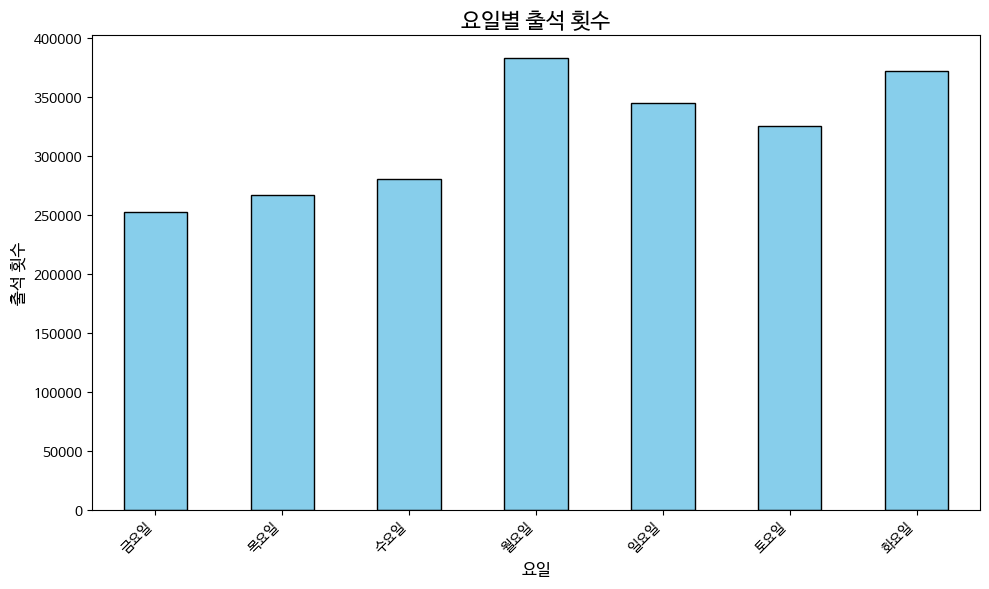

In [ ]:
import matplotlib.pyplot as plt

# ÏöîÏùºÎ≥Ñ Ï∂úÏÑù ÌöüÏàò Í≥ÑÏÇ∞
weekday_counts = accounts_attendance['weekday_name'].explode().value_counts()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
weekday_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏöîÏùºÎ≥Ñ Ï∂úÏÑù ÌöüÏàò', fontsize=16)
plt.xlabel('ÏöîÏùº', fontsize=12)
plt.ylabel('Ï∂úÏÑù ÌöüÏàò', fontsize=12)

# ÏöîÏùº Î†àÏù¥Î∏îÏùÑ Í∞ÄÎèÖÏÑ± Ï¢ãÍ≤å ÌëúÏãú
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


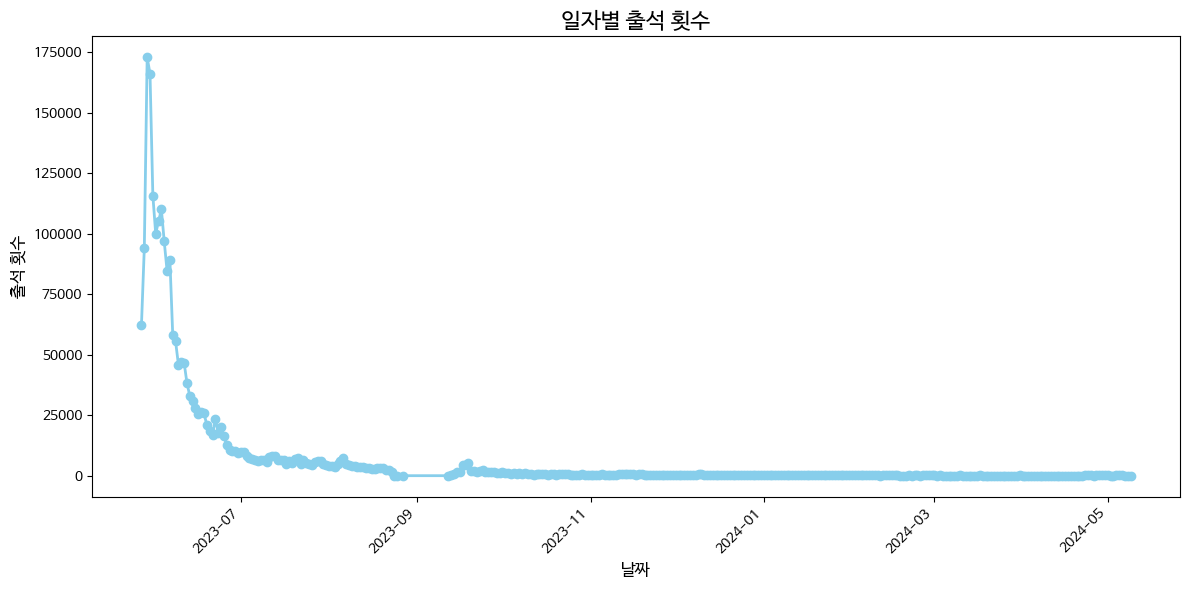

In [ ]:
import matplotlib.pyplot as plt

# Ï∂úÏÑù ÎÇ†ÏßúÎ≥Ñ Ï∂úÏÑù ÌöüÏàò Í≥ÑÏÇ∞
attendance_per_day = accounts_attendance.explode('attendance_date_list')['attendance_date_list'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
attendance_per_day.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏùºÏûêÎ≥Ñ Ï∂úÏÑù ÌöüÏàò', fontsize=16)
plt.xlabel('ÎÇ†Ïßú', fontsize=12)
plt.ylabel('Ï∂úÏÑù ÌöüÏàò', fontsize=12)

# xÏ∂ï ÎÇ†Ïßú Ìè¨Îß∑ÌåÖ
plt.xticks(rotation=45, ha='right')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.tight_layout()
plt.show()


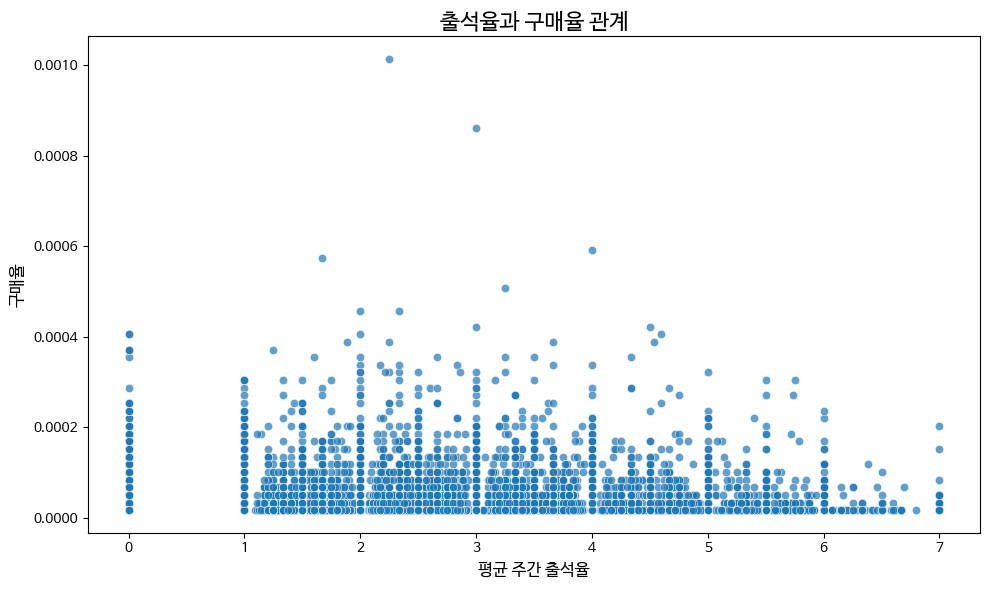

Ï∂úÏÑùÏú®Í≥º Íµ¨Îß§Ïú® Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.04203201786694622


In [ ]:
# 1. Íµ¨Îß§Ïú® Í≥ÑÏÇ∞ (ÏòàÏãú: Ïú†Ï†ÄÎ≥Ñ Íµ¨Îß§ ÌöüÏàò)
# accounts_paymenthistory ÌÖåÏù¥Î∏îÏóêÏÑú Ïú†Ï†ÄÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
purchase_count = accounts_paymenthistory.groupby('user_id')['productId'].count()

# Ï¥ù Íµ¨Îß§Ïûê Ïàò
total_users = accounts_paymenthistory['user_id'].nunique()

# Íµ¨Îß§Ïú® Í≥ÑÏÇ∞: ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Íµ¨Îß§Ìïú ÎπÑÏú®
purchase_rate = purchase_count / total_users

# 2. Ï∂úÏÑùÏú® Í≥ÑÏÇ∞ (ÏòàÏãú: ÌèâÍ∑† Ï∂úÏÑùÏú® ÌôúÏö©)
attendance_rate = accounts_attendance[['user_id', 'avg_weekly_attendance']]

# 3. Îëê ÌÖåÏù¥Î∏î Î≥ëÌï©
merged_data = pd.merge(attendance_rate, purchase_rate, on='user_id', how='inner', suffixes=('_attendance', '_purchase'))

# 4. Î∂ÑÏÑù: Ï∂úÏÑùÏú®Í≥º Íµ¨Îß§Ïú® Í∞ÑÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
import seaborn as sns
import matplotlib.pyplot as plt

# ÏÇ∞Ï†êÎèÑÎ°ú Ï∂úÏÑùÏú®Í≥º Íµ¨Îß§Ïú® Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='avg_weekly_attendance', y='productId', alpha=0.7)
plt.title('Ï∂úÏÑùÏú®Í≥º Íµ¨Îß§Ïú® Í¥ÄÍ≥Ñ', fontsize=16)
plt.xlabel('ÌèâÍ∑† Ï£ºÍ∞Ñ Ï∂úÏÑùÏú®', fontsize=12)
plt.ylabel('Íµ¨Îß§Ïú®', fontsize=12)
plt.tight_layout()
plt.show()

# Ï∂úÏÑùÏú®Í≥º Íµ¨Îß§Ïú® Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged_data['avg_weekly_attendance'].corr(merged_data['productId'])
print(f'Ï∂úÏÑùÏú®Í≥º Íµ¨Îß§Ïú® Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation}')


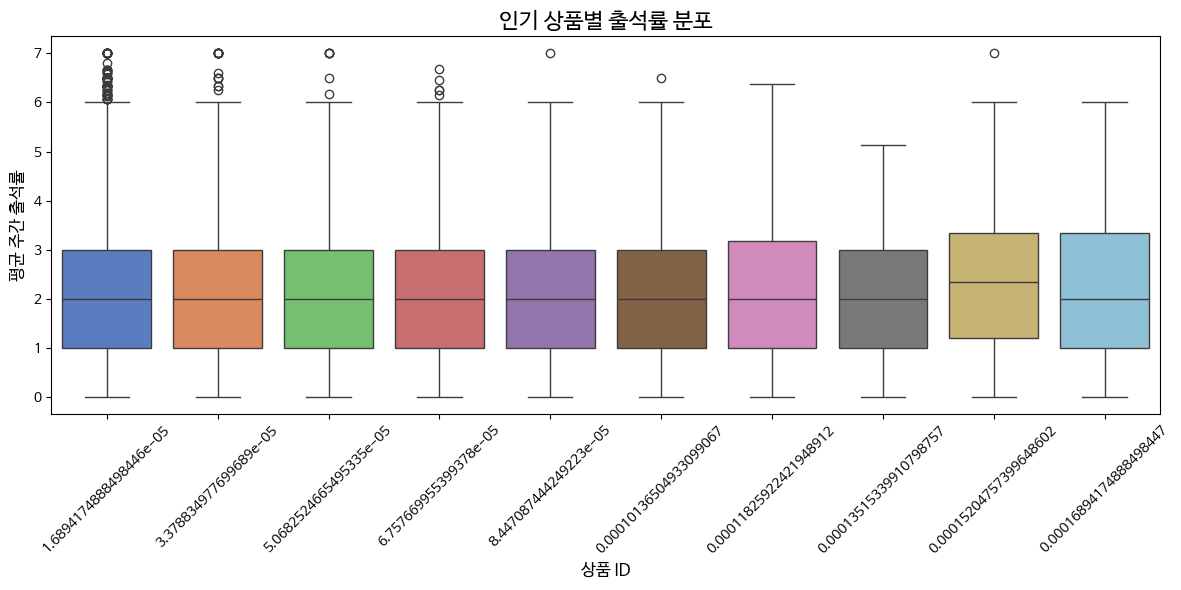

In [ ]:
# ÏÉÅÌíàÎ≥Ñ Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞ÏôÄ Ï∂úÏÑùÎ•† Í∞Ñ ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Í≥ÑÏÇ∞
product_attendance_corr = merged_data.groupby('productId')['avg_weekly_attendance'].mean()

# ÏÉÅÏúÑ Ïù∏Í∏∞ ÏÉÅÌíà(Íµ¨Îß§Í∞Ä ÎßéÏùÄ ÏÉÅÌíà) ÏÉÅÏúÑ 10Í∞ú ÌôïÏù∏
top_products = merged_data['productId'].value_counts().head(10).index
top_product_data = merged_data[merged_data['productId'].isin(top_products)]

# Ïù∏Í∏∞ ÏÉÅÌíàÎ≥Ñ Ï∂úÏÑùÎ•† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_product_data, x='productId', y='avg_weekly_attendance', palette='muted')
plt.title('Ïù∏Í∏∞ ÏÉÅÌíàÎ≥Ñ Ï∂úÏÑùÎ•† Î∂ÑÌè¨', fontsize=16)
plt.xlabel('ÏÉÅÌíà ID', fontsize=12)
plt.ylabel('ÌèâÍ∑† Ï£ºÍ∞Ñ Ï∂úÏÑùÎ•†', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
accounts_paymenthistory.head()

id  productId phone_type           created_at  user_id
0   6  heart.777          A  2023-05-13 21:28:34  1211127
1   7  heart.777          A  2023-05-13 21:29:39  1151343
2   8  heart.777          A  2023-05-13 21:31:33  1002147
3   9  heart.777          A  2023-05-13 21:31:39  1095040
4  11  heart.777          A  2023-05-13 21:34:32  1164081

In [ ]:
# Í∞ÄÏû• ÎßéÏù¥ ÌåîÎ¶∞ productIdÏôÄ Ìï¥Îãπ ÏàòÎüâ Í≥ÑÏÇ∞
most_sold_product = accounts_paymenthistory['productId'].value_counts().idxmax()
most_sold_count = accounts_paymenthistory['productId'].value_counts().max()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Í∞ÄÏû• ÎßéÏù¥ ÌåîÎ¶∞ productId: {most_sold_product}")
print(f"ÌåêÎß§ ÏàòÎüâ: {most_sold_count}")

# ÏÉÅÏúÑ 10Í∞ú Ïù∏Í∏∞ ÏÉÅÌíàÎèÑ Ìï®Íªò Ï∂úÎ†•
top_10_products = accounts_paymenthistory['productId'].value_counts().head(10)
print("\nÏÉÅÏúÑ 10Í∞ú Ïù∏Í∏∞ ÏÉÅÌíàÍ≥º ÏàòÎüâ:")
print(top_10_products)


Í∞ÄÏû• ÎßéÏù¥ ÌåîÎ¶∞ productId: heart.777
ÌåêÎß§ ÏàòÎüâ: 57873

ÏÉÅÏúÑ 10Í∞ú Ïù∏Í∏∞ ÏÉÅÌíàÍ≥º ÏàòÎüâ:
productId
heart.777     57873
heart.1000    19309
heart.200     15822
heart.4000     2136
Name: count, dtype: int64


In [ ]:
accounts_attendance.head()

id                               attendance_date_list  user_id  total_days  \
0   1  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1446852        13.0   
1   2  [2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...  1359398        33.0   
2   3  [2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...  1501542         9.0   
3   4  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1507767        30.0   
4   5  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1287453        31.0   

   max_streak  avg_weekly_attendance  \
0         4.0               1.500000   
1         9.0               2.909091   
2         5.0               2.666667   
3        18.0               4.833333   
4        30.0               5.000000   

                                             weekday  \
0            [5, 6, 0, 1, 5, 1, 0, 3, 0, 0, 1, 3, 1]   
1  [5, 0, 1, 4, 5, 0, 2, 3, 5, 6, 3, 4, 5, 6, 0, ...   
2                        [5, 0, 1, 2, 3, 4, 1, 2, 2]   
3  [5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...   
4  [5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...   

                                        weekday_name  
0  [ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÌÜ†ÏöîÏùº, ÌôîÏöîÏùº, ÏõîÏöîÏùº, Î™©ÏöîÏùº, ÏõîÏöîÏùº, ...  
1  [ÌÜ†ÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, Í∏àÏöîÏùº, ÌÜ†ÏöîÏùº, ÏõîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, ÌÜ†ÏöîÏùº, ...  
2      [ÌÜ†ÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, Í∏àÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, ÏàòÏöîÏùº]  
3  [ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, Í∏àÏöîÏùº, ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ...  
4  [ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ÏõîÏöîÏùº, ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº, Í∏àÏöîÏùº, ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº, ...

### Ï∞®Îã® Í∏∞Î°ùÍ≥º Ïú†Ï†Ä ÌôúÎèô ÎπÑÍµê

In [ ]:
# accounts_attendanceÏùò Ïª¨ÎüºÎ™Ö ÌôïÏù∏
print(accounts_attendance.columns)


Index(['id', 'attendance_date_list', 'user_id'], dtype='object')


In [ ]:
# 'attendance_date_list'Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï£ºÎ≥Ñ Ï∂úÏÑù ÌöüÏàò Í≥ÑÏÇ∞
# 'attendance_date_list'Í∞Ä Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏù¥ÎØÄÎ°ú, Ïù¥Î•º 7ÏùºÏî© Ï£º Îã®ÏúÑÎ°ú Î¨∂Ïñ¥ÏÑú Ï∂úÏÑùÎ•†ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.

# Ï∂úÏÑùÏùº Î¶¨Ïä§Ìä∏Î•º ÎÇ†ÏßúÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ï£ºÎ≥ÑÎ°ú Í∑∏Î£πÌôî
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(lambda x: sorted(x) if isinstance(x, list) else [])

# Ï£ºÎ≥Ñ Ï∂úÏÑùÎ•† Í≥ÑÏÇ∞
def calculate_weekly_attendance(attendance_dates):
    weekly_attendance = []
    for i in range(0, len(attendance_dates), 7):  # 7ÏùºÏî© ÎÇòÎà†ÏÑú Ï£º Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞
        week = attendance_dates[i:i+7]
        weekly_attendance.append(len(week) / 7)  # Ï£ºÎãπ Ï∂úÏÑùÎ•† Í≥ÑÏÇ∞
    return weekly_attendance

# 'avg_weekly_attendance' Ïª¨ÎüºÏóê Ï£ºÎ≥Ñ Ï∂úÏÑùÎ•† Î¶¨Ïä§Ìä∏ Ï∂îÍ∞Ä
accounts_attendance['avg_weekly_attendance'] = accounts_attendance['attendance_date_list'].apply(calculate_weekly_attendance)

# Ï£ºÎ≥Ñ Ï∂úÏÑùÎ•†ÏùÑ ÌèâÍ∑†ÌïòÏó¨ 'avg_weekly_attendance' Ïª¨ÎüºÏóê Ï†ÄÏû• (Ï∂úÏÑùÎ•†Ïù¥ Ïó¨Îü¨ Î≤à ÎÇòÏò¨ Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÌèâÍ∑†Í∞íÏùÑ Í≥ÑÏÇ∞)
accounts_attendance['avg_weekly_attendance'] = accounts_attendance['avg_weekly_attendance'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# Ï∂úÏÑùÎ•† ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨Î°ú Î∞òÏò¨Î¶º
accounts_attendance['avg_weekly_attendance'] = accounts_attendance['avg_weekly_attendance'].round(3)

# Í≤∞Í≥º ÌôïÏù∏
print(accounts_attendance[['user_id', 'avg_weekly_attendance']].head())


   user_id  avg_weekly_attendance
0  1446852                      0
1  1359398                      0
2  1501542                      0
3  1507767                      0
4  1287453                      0


In [ ]:
# accounts_blockrecord Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∂àÎü¨Ïò§Í∏∞
# Ï∞®Îã®Îêú Ïú†Ï†Ä Î™©Î°ù Ï∂îÏ∂ú
blocked_users = accounts_blockrecord['user_id'].unique()

# Ï∞®Îã®Îêú Ïú†Ï†ÄÏôÄ Ï∞®Îã®ÎêòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÏùò Ï∂úÏÑùÎ•† ÎπÑÍµê
blocked_attendance = accounts_attendance[accounts_attendance['user_id'].isin(blocked_users)]
non_blocked_attendance = accounts_attendance[~accounts_attendance['user_id'].isin(blocked_users)]

# Í∞Å Í∑∏Î£πÏùò ÌèâÍ∑† Ï∂úÏÑùÎ•† Í≥ÑÏÇ∞
blocked_avg_attendance = blocked_attendance['avg_weekly_attendance'].mean()
non_blocked_avg_attendance = non_blocked_attendance['avg_weekly_attendance'].mean()

print(f"Ï∞®Îã®Îêú Ïú†Ï†Ä ÌèâÍ∑† Ï∂úÏÑùÎ•†: {blocked_avg_attendance}")
print(f"Ï∞®Îã®ÎêòÏßÄ ÏïäÏùÄ Ïú†Ï†Ä ÌèâÍ∑† Ï∂úÏÑùÎ•†: {non_blocked_avg_attendance}")


Ï∞®Îã®Îêú Ïú†Ï†Ä ÌèâÍ∑† Ï∂úÏÑùÎ•†: 0.0
Ï∞®Îã®ÎêòÏßÄ ÏïäÏùÄ Ïú†Ï†Ä ÌèâÍ∑† Ï∂úÏÑùÎ•†: 0.0


In [ ]:
import pandas as pd



# Ìà¨ÌëúÏú®Í≥º Ïä§ÌÇµÏú® Í≥ÑÏÇ∞
vote_rate = polls_questionpiece["is_voted"].mean()  # Ï†ÑÏ≤¥ Ìà¨ÌëúÏú®
skip_rate = polls_questionpiece["is_skipped"].mean()  # Ï†ÑÏ≤¥ Ïä§ÌÇµÏú®

# ÏßàÎ¨∏Î≥Ñ Ìà¨ÌëúÏú®Í≥º Ïä§ÌÇµÏú® Í≥ÑÏÇ∞
question_response_stats = polls_questionpiece.groupby("question_id").agg(
    vote_rate=("is_voted", "mean"),
    skip_rate=("is_skipped", "mean"),
    total_responses=("question_id", "count")
).reset_index()

print(f"Ï†ÑÏ≤¥ Ìà¨ÌëúÏú®: {vote_rate:.2%}")
print(f"Ï†ÑÏ≤¥ Ïä§ÌÇµÏú®: {skip_rate:.2%}")
print(question_response_stats.head())  # ÏÉÅÏúÑ 5Í∞ú Îç∞Ïù¥ÌÑ∞ Ï∂úÎ†•


Ï†ÑÏ≤¥ Ìà¨ÌëúÏú®: 96.30%
Ï†ÑÏ≤¥ Ïä§ÌÇµÏú®: 0.09%
   question_id  vote_rate  skip_rate  total_responses
0           99   0.983759   0.000000             1724
1          100   0.979839   0.000000             1736
2          101   0.981632   0.000000             1851
3          102   0.985316   0.000000             1975
4          103   0.980180   0.000601             1665


ÏàòÏÉÅÌï†Ï†ïÎèÑÎ°ú ÎÜíÏùÄ Ìà¨ÌëúÏú®..
ÌôïÏù∏ Í≤∞Í≥º -> is_skipped ==1 ÏùºÎïå is_voted ÎòêÌïú 1Ïù∏Í±∏Î°ú Î≥º Ïàò ÏûàÏóàÏùå.


### Ïã†Í≥†Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
- Ïã†Í≥†Í∞Ä ÎßéÏù¥ Ï†ëÏàòÎêú ÏßàÎ¨∏ Î∂ÑÏÑù


In [ ]:


# Ïã†Í≥†Îêú ÏßàÎ¨∏Î≥Ñ Ïã†Í≥† ÌöüÏàò Î∂ÑÏÑù
report_counts = polls_questionreport.groupby("question_id")["user_id"].count().reset_index()
report_counts.columns = ["question_id", "report_count"]

# Ïã†Í≥†Í∞Ä Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ 10Í∞ú ÏßàÎ¨∏
top_reported_questions = report_counts.sort_values(by="report_count", ascending=False).head(20)

print(top_reported_questions)


     question_id  report_count
12           111           988
311          410           803
299          398           660
325          424           533
206          305           493
465          564           338
45           144           307
420          519           283
395          494           258
380          479           239
135          234           236
39           138           220
439          538           218
10           109           209
377          476           209
317          416           205
333          432           203
366          465           202
9            108           196
334          433           196


üìå Ï†ÑÏ≤¥ ÏßàÎ¨∏Ïùò ÌèâÍ∑† Ïã†Í≥† ÌöüÏàò: 16.40


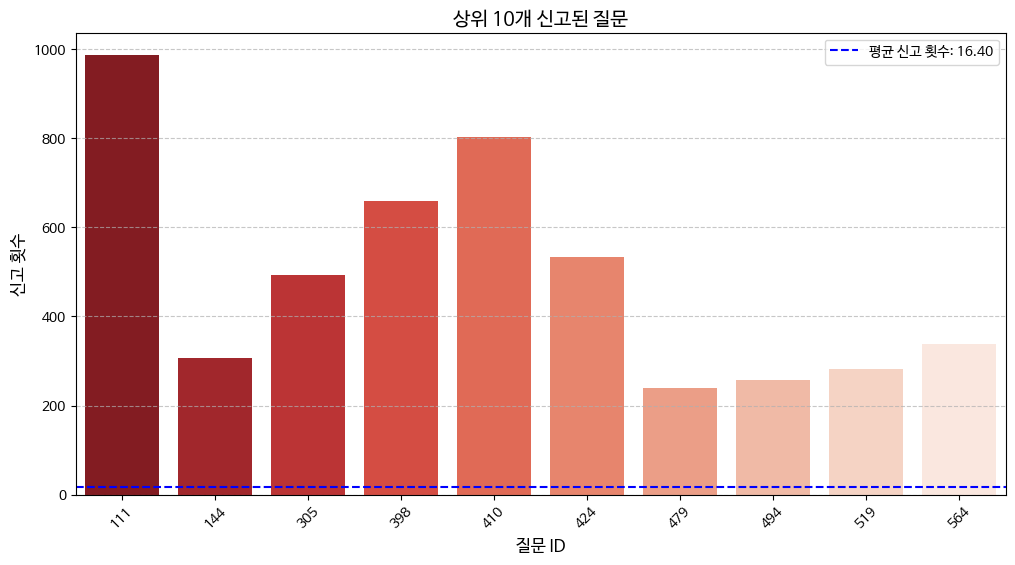

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ïã†Í≥†Îêú ÏßàÎ¨∏Î≥Ñ Ïã†Í≥† ÌöüÏàò Í≥ÑÏÇ∞
report_counts = polls_questionreport.groupby("question_id")["user_id"].count().reset_index()
report_counts.columns = ["question_id", "report_count"]

# Ï†ÑÏ≤¥ ÌèâÍ∑† Ïã†Í≥† ÌöüÏàò Í≥ÑÏÇ∞
average_report_count = report_counts["report_count"].mean()
print(f"üìå Ï†ÑÏ≤¥ ÏßàÎ¨∏Ïùò ÌèâÍ∑† Ïã†Í≥† ÌöüÏàò: {average_report_count:.2f}")

# Ïã†Í≥†Í∞Ä Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ 10Í∞ú ÏßàÎ¨∏
top_reported_questions = report_counts.sort_values(by="report_count", ascending=False).head(10)

# ÏãúÍ∞ÅÌôî - Ïã†Í≥† ÌöüÏàòÍ∞Ä ÎßéÏùÄ ÏßàÎ¨∏ (XÏ∂ï: ÏßàÎ¨∏ ID, YÏ∂ï: Ïã†Í≥† ÌöüÏàò)
plt.figure(figsize=(12, 6))
sns.barplot(x="question_id", y="report_count", data=top_reported_questions, palette="Reds_r")

# ÌèâÍ∑† Ïã†Í≥† ÌöüÏàò ÎùºÏù∏ Ï∂îÍ∞Ä
plt.axhline(average_report_count, color="blue", linestyle="dashed", label=f"ÌèâÍ∑† Ïã†Í≥† ÌöüÏàò: {average_report_count:.2f}")

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.xticks(rotation=45)  # XÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
plt.xlabel("ÏßàÎ¨∏ ID", fontsize=12)
plt.ylabel("Ïã†Í≥† ÌöüÏàò", fontsize=12)
plt.title("ÏÉÅÏúÑ 10Í∞ú Ïã†Í≥†Îêú ÏßàÎ¨∏", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [ ]:
polls_question.head()

id                 question_text           created_at
0   99            Í∞ÄÏû• Ïã†ÎπÑÌïú Îß§Î†•Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:22:53
1  100  Ïù¥ ÏÇ¨ÎûåÏúºÎ°ú Ìïú Î≤à ÏÇ¥ÏïÑÎ≥¥Í≥† Ïã∂Îã§" ÌïòÎäî ÏÇ¨ÎûåÏùÄ?"  2023-03-31 15:22:53
2  101                     ÎØ∏ÎûòÏùò Ìã±ÌÜ°Ïª§Îäî?  2023-03-31 15:22:54
3  102               Ïó¨Í∏∞ÏÑú Ï†úÏùº ÌäπÏù¥Ìïú ÏπúÍµ¨Îäî?  2023-03-31 15:22:54
4  103               Í∞ÄÏû• ÏßÄÏºúÏ£ºÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:22:55

In [ ]:
polls_questionpiece.head()

id  is_voted           created_at  question_id  is_skipped
0  998458         1  2023-04-28 12:27:22          252           0
1  998459         1  2023-04-28 12:27:22          244           0
2  998460         1  2023-04-28 12:27:22          183           0
3  998461         1  2023-04-28 12:27:22          101           0
4  998462         1  2023-04-28 12:27:22          209           0

In [ ]:
polls_questionreport.head()

id                reason           created_at  question_id  user_id
0   1           Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî  2023-04-19 06:20:35          250   837556
1   2           Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî  2023-04-19 06:58:09          113   837672
2   3       Î∂àÏæåÌïú ÎÇ¥Ïö©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå  2023-04-19 06:58:17          113   837672
3   4  Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†!  2023-04-19 08:12:42          119   837922
4   5  Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†!  2023-04-19 08:12:50          119   837922

In [ ]:
polls_questionset.head()

id                             question_piece_id_list  \
0  99817  [998458, 998459, 998460, 998461, 998462, 99846...   
1  99830  [998588, 998589, 998590, 998591, 998592, 99859...   
2  99840  [998689, 998691, 998693, 998695, 998697, 99869...   
3  99841  [998688, 998690, 998692, 998694, 998696, 99869...   
4  99848  [998768, 998769, 998770, 998771, 998772, 99877...   

          opening_time status           created_at  user_id  
0  2023-04-28 12:27:22      F  2023-04-28 12:27:23   849436  
1  2023-04-28 12:28:07      F  2023-04-28 12:28:07   849438  
2  2023-04-28 12:28:38      F  2023-04-28 12:28:38   847375  
3  2023-04-28 12:28:38      F  2023-04-28 12:28:38   849446  
4  2023-04-28 12:28:57      F  2023-04-28 12:28:57   849477

In [ ]:
polls_questionreport.shape[0]

51424

In [ ]:
polls_question.shape[0]

5025

In [ ]:
# polls_questionreportÏôÄ polls_questionÏùÑ question_id Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_report_df = polls_questionreport.merge(
    polls_question,
    left_on="question_id",  # Ïã†Í≥† Îç∞Ïù¥ÌÑ∞Ïùò question_id
    right_on="id",  # ÏßàÎ¨∏ Îç∞Ïù¥ÌÑ∞Ïùò id
    how="inner"  # ÏùºÏπòÌïòÎäî Îç∞Ïù¥ÌÑ∞Îßå Ìè¨Ìï®
)

# Í≤∞Í≥º ÌôïÏù∏
print(merged_report_df.head())


   id_x                reason         created_at_x  question_id  user_id  \
0     1           Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî  2023-04-19 06:20:35          250   837556   
1     2           Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî  2023-04-19 06:58:09          113   837672   
2     3       Î∂àÏæåÌïú ÎÇ¥Ïö©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå  2023-04-19 06:58:17          113   837672   
3     4  Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†!  2023-04-19 08:12:42          119   837922   
4     5  Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†!  2023-04-19 08:12:50          119   837922   

   id_y            question_text         created_at_y  
0   250     ÏôÄÏù¥ÎìúÌïú ÎäêÎÇåÏù¥ Ïûò Ïñ¥Ïö∏Î¶¨Îäî ÏÇ¨ÎûåÏùÄ?  2023-04-01 11:09:27  
1   113     Ï≤´Ïù∏ÏÉÅÍ≥º ÏïÑÏòà Î∞òÎåÄÎùºÍ≥† ÎäêÎÇÄ ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:23:00  
2   113     Ï≤´Ïù∏ÏÉÅÍ≥º ÏïÑÏòà Î∞òÎåÄÎùºÍ≥† ÎäêÎÇÄ ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:23:00  
3   119  ÏãúÍ∞Ñ ÏïΩÏÜçÏùÑ Ï†úÏùº Ïûò ÏßÄÌÇ¨Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:23:02  
4   119  ÏãúÍ∞Ñ ÏïΩÏÜçÏùÑ Ï†ú

In [ ]:
merged_report_df.shape[0]

51424

Ï†úÎåÄÎ°ú mergeÎêúÍ≤ÉÏùÑ ÌôïÏù∏Ìï†Ïàò ÏûàÏùå


In [ ]:
unique_question_count = merged_report_df["question_id"].nunique()
print(unique_question_count)


3135


Ïã†Í≥†ÎãπÌïú Ï¥ù questionÏùÄ 3135Í∞úÎ°ú ÎÇòÏôîÎã§.

#### Ïã†Í≥† ÏßëÏ§ëÎèÑ Î∂ÑÏÑù
- ÌäπÏ†ï ÏßàÎ¨∏ÏóêÏÑú Ïú†ÎèÖ ÎßéÏùÄ Ïã†Í≥†Í∞Ä ÏùºÏñ¥ÎÇòÎäîÏßÄ. Í≥†Î•¥Í≤å Ïã†Í≥†Í∞Ä ÎêòÎäîÏßÄ ÌôïÏù∏

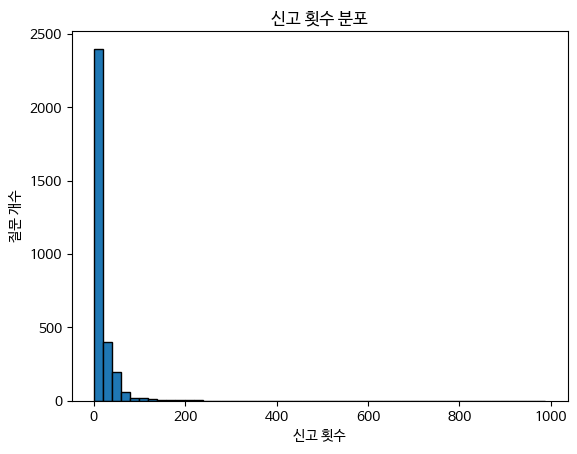

In [ ]:
import matplotlib.pyplot as plt

plt.hist(merged_report_df["question_id"].value_counts(), bins=50, edgecolor="black")
plt.xlabel("Ïã†Í≥† ÌöüÏàò")
plt.ylabel("ÏßàÎ¨∏ Í∞úÏàò")
plt.title("Ïã†Í≥† ÌöüÏàò Î∂ÑÌè¨")
plt.show()


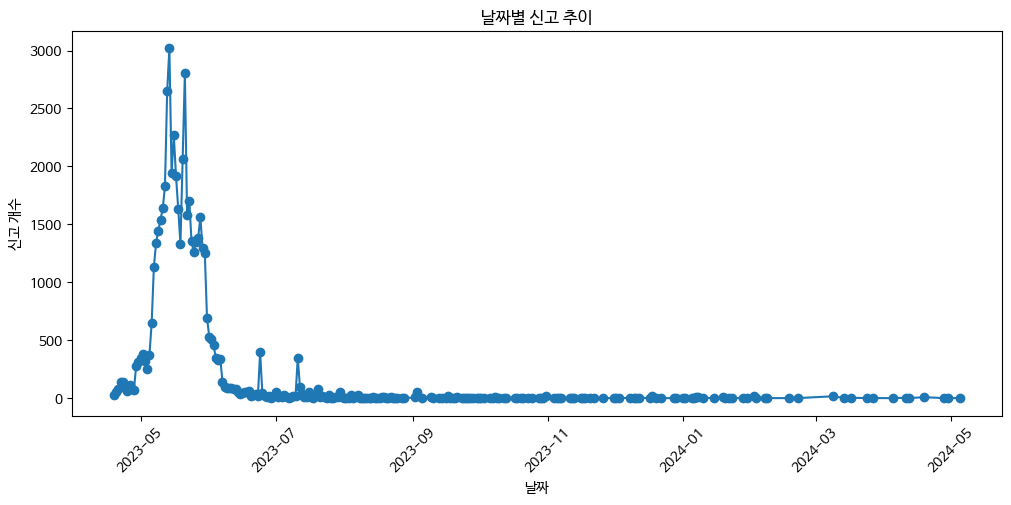

In [ ]:
polls_questionreport["created_at"] = pd.to_datetime(polls_questionreport["created_at"])
daily_reports = polls_questionreport.groupby(polls_questionreport["created_at"].dt.date).size()

plt.figure(figsize=(12, 5))
plt.plot(daily_reports.index, daily_reports.values, marker="o", linestyle="-")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ïã†Í≥† Í∞úÏàò")
plt.title("ÎÇ†ÏßúÎ≥Ñ Ïã†Í≥† Ï∂îÏù¥")
plt.xticks(rotation=45)
plt.show()


ÏúÑÏóêÏûàÎçò ÏßàÎ¨∏ ÏÉùÏÑ± ÌÖåÏù¥Î∏îÍ≥º ÎπÑÍµêÌñàÏùÑÎïå Ïã†Í≥†Îêú ÎÇ†Ïßú ÎòêÌïú ÏßàÎ¨∏ ÏÉùÏÑ±ÏùºÏûêÏôÄ ÎπÑÏä∑ÌïòÍ≤å ÏßÑÌñâÎêòÎäîÍ≤É Í∞ôÏùå
ÏïÑÎ¨¥ÎûòÎèÑ Í∑∏Îïå ÏÇ¨ÎûåÎì§Ïù¥ ÎßéÏù¥ ÌôúÎèôÏùÑ ÌñàÏúºÎãàÍπê..


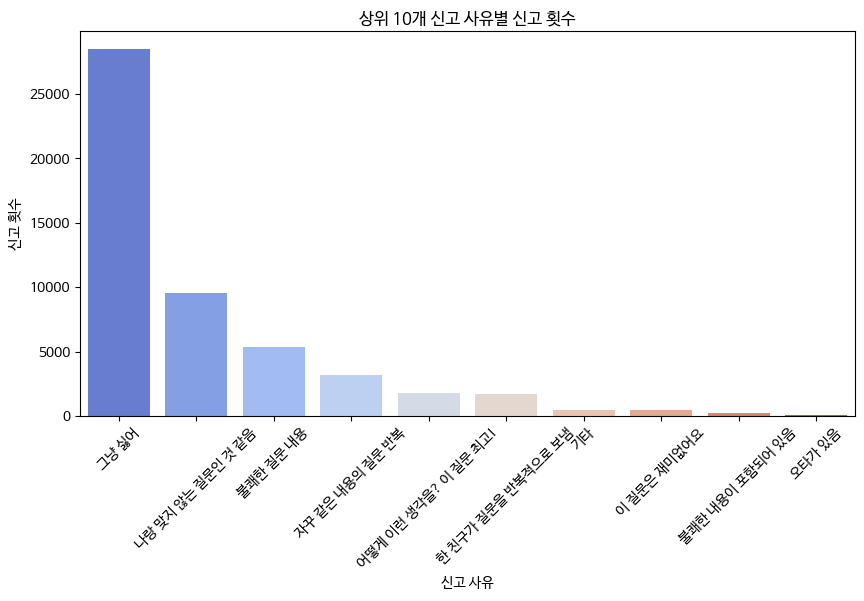

reason
Í∑∏ÎÉ• Ïã´Ïñ¥                   28446
ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå        9541
Î∂àÏæåÌïú ÏßàÎ¨∏ ÎÇ¥Ïö©                5386
ÏûêÍæ∏ Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò ÏßàÎ¨∏ Î∞òÎ≥µ          3202
Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†!     1821
Ìïú ÏπúÍµ¨Í∞Ä ÏßàÎ¨∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î≥¥ÎÉÑ       1701
Í∏∞ÌÉÄ                        480
Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî               471
Î∂àÏæåÌïú ÎÇ¥Ïö©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå           250
Ïò§ÌÉÄÍ∞Ä ÏûàÏùå                     68
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ïã†Í≥† ÏÇ¨Ïú†Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
reason_counts = polls_questionreport["reason"].value_counts()

# ÏÉÅÏúÑ Ïã†Í≥† ÏÇ¨Ïú† 10Í∞ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(x=reason_counts.index[:10], y=reason_counts.values[:10], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Ïã†Í≥† ÏÇ¨Ïú†")
plt.ylabel("Ïã†Í≥† ÌöüÏàò")
plt.title("ÏÉÅÏúÑ 10Í∞ú Ïã†Í≥† ÏÇ¨Ïú†Î≥Ñ Ïã†Í≥† ÌöüÏàò")
plt.show()

# Ïã†Í≥† ÏÇ¨Ïú†Î≥Ñ Í∞úÏàò Ï∂úÎ†•
print(reason_counts.head(10))


In [ ]:
# Ïã†Í≥†Îêú ÏßàÎ¨∏Î≥Ñ Ïã†Í≥† ÌöüÏàò ÏßëÍ≥Ñ
top_reported_questions = polls_questionreport["question_id"].value_counts().head(10)

# ÏßàÎ¨∏ ÎÇ¥Ïö©Í≥º Ïã†Í≥† ÌöüÏàò Î≥ëÌï©
top_reported_df = polls_question[polls_question["id"].isin(top_reported_questions.index)].copy()
top_reported_df["report_count"] = top_reported_df["id"].map(top_reported_questions)

# ÏÉÅÏúÑ 10Í∞ú Ïã†Í≥†Îêú ÏßàÎ¨∏ Ï∂úÎ†•
print(top_reported_df[["question_text", "report_count"]].sort_values(by="report_count", ascending=False))


                  question_text  report_count
12             ÎßàÏä§ÌÅ¨Í∞Ä Ïûò Ïñ¥Ïö∏Î¶¨Îäî ÏÇ¨ÎûåÏùÄ?           988
311     Î∞úÎÉÑÏÉàÍ∞Ä Ìò∏ÎëêÍ≥ºÏûê ÎÉÑÏÉàÏùº Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           803
299              Îì±Îπ®Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ ÏÇ¨ÎûåÏùÄ?           660
325              Ïñ¥Íπ®Í∞Ä Í∞ÄÏû• ÎÑìÏùÄ ÏÇ¨ÎûåÏùÄ?           533
206         Î®πÎ∞©ÏùÑ Í∞ÄÏû• ÏûòÌï† Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           493
465           ÏÑ§Î†àÎ©¥ ÏΩßÍµ¨Î©çÏù¥ Ïª§ÏßÄÎäî ÏπúÍµ¨Îäî?           338
45        Î∞úÎÉÑÏÉàÍ∞Ä Í∞ÄÏû• Ìñ•Í∏ãÌï† Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           307
420    ÏΩßÏàòÏóºÏùÑ Í∏∞Î•¥Î©¥ Ïûò Ïñ¥Ïö∏Î¶¥ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           283
395  Î®πÎ∞© Ï∞çÏúºÎ©¥ 100Îßå Ïú†ÌäúÎ≤ÑÍ∞Ä Îê† Í≤É Í∞ôÏùÄ ÏπúÍµ¨           258
380            ÏπòÌÇ® Ï§ëÎèÖÏù∏ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           239


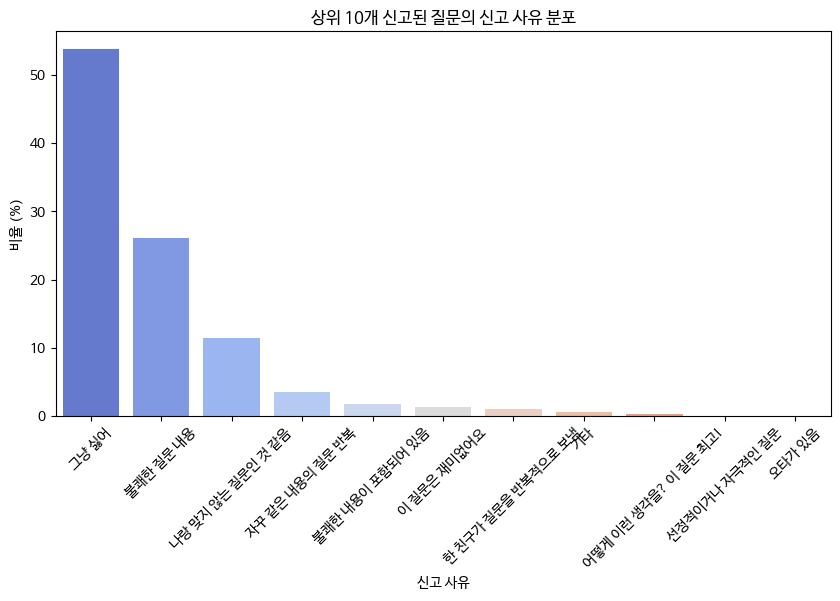

reason
Í∑∏ÎÉ• Ïã´Ïñ¥                   53.733170
Î∂àÏæåÌïú ÏßàÎ¨∏ ÎÇ¥Ïö©               26.132191
ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå       11.485108
ÏûêÍæ∏ Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò ÏßàÎ¨∏ Î∞òÎ≥µ          3.549572
Î∂àÏæåÌïú ÎÇ¥Ïö©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå          1.733986
Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî              1.346389
Ìïú ÏπúÍµ¨Í∞Ä ÏßàÎ¨∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î≥¥ÎÉÑ       0.999592
Í∏∞ÌÉÄ                       0.550796
Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†!     0.367197
ÏÑ†Ï†ïÏ†ÅÏù¥Í±∞ÎÇò ÏûêÍ∑πÏ†ÅÏù∏ ÏßàÎ¨∏           0.061200
Name: proportion, dtype: float64


In [ ]:
# ÏÉÅÏúÑ 10Í∞ú ÏßàÎ¨∏Ïùò Ïã†Í≥† Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
top_reported_question_ids = top_reported_df["id"].tolist()
filtered_reports = polls_questionreport[polls_questionreport["question_id"].isin(top_reported_question_ids)]

# Ïã†Í≥† ÏÇ¨Ïú†Î≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
top_reported_reason_counts = filtered_reports["reason"].value_counts(normalize=True) * 100

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(x=top_reported_reason_counts.index, y=top_reported_reason_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Ïã†Í≥† ÏÇ¨Ïú†")
plt.ylabel("ÎπÑÏú® (%)")
plt.title("ÏÉÅÏúÑ 10Í∞ú Ïã†Í≥†Îêú ÏßàÎ¨∏Ïùò Ïã†Í≥† ÏÇ¨Ïú† Î∂ÑÌè¨")
plt.show()

# Ïã†Í≥† ÏÇ¨Ïú† ÎπÑÏú® Ï∂úÎ†•
print(top_reported_reason_counts.head(10))


<Figure size 1200x600 with 0 Axes>

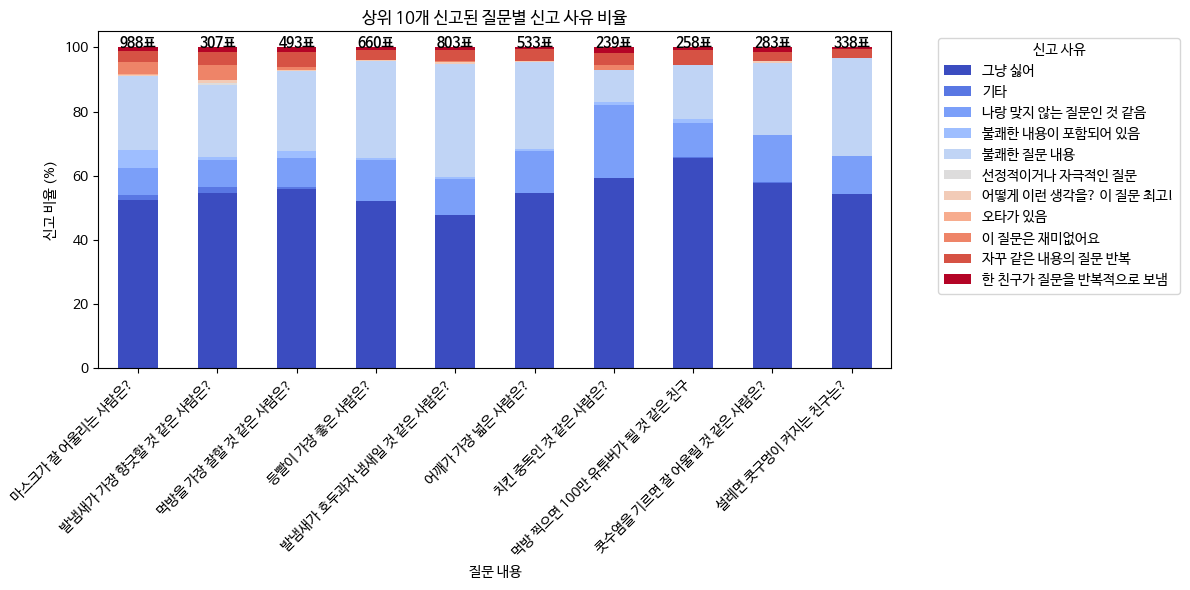

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ÏÉÅÏúÑ 10Í∞ú Ïã†Í≥†Îêú ÏßàÎ¨∏Î≥Ñ Ïã†Í≥† ÌöüÏàò ÏßëÍ≥Ñ
top_reported_questions = polls_questionreport["question_id"].value_counts().head(10)

# ÏÉÅÏúÑ Ïã†Í≥†Îêú ÏßàÎ¨∏Í≥º Ïã†Í≥† ÌöüÏàò Î≥ëÌï©
top_reported_df = polls_question[polls_question["id"].isin(top_reported_questions.index)].copy()
top_reported_df["report_count"] = top_reported_df["id"].map(top_reported_questions)

# ÏÉÅÏúÑ 10Í∞ú Ïã†Í≥†Îêú ÏßàÎ¨∏Ïùò Ïã†Í≥† Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
filtered_reports = polls_questionreport[polls_questionreport["question_id"].isin(top_reported_df["id"])]

# Ïã†Í≥† ÏÇ¨Ïú†Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
reason_counts_per_question = filtered_reports.groupby(["question_id", "reason"]).size().reset_index(name="count")

# Í∞Å ÏßàÎ¨∏Î≥Ñ Ïã†Í≥† Ï¥ùÌï© Íµ¨ÌïòÍ∏∞
total_reports_per_question = reason_counts_per_question.groupby("question_id")["count"].sum().reset_index()
total_reports_per_question.rename(columns={"count": "total_reports"}, inplace=True)

# Í∞Å Ïã†Í≥† ÏÇ¨Ïú†Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
reason_counts_per_question = reason_counts_per_question.merge(total_reports_per_question, on="question_id")
reason_counts_per_question["percentage"] = (reason_counts_per_question["count"] / reason_counts_per_question["total_reports"]) * 100

# Îç∞Ïù¥ÌÑ∞Î•º pivotÌïòÏó¨ ÏãúÍ∞ÅÌôîÏóê ÎßûÍ≤å Î≥ÄÌôò
pivot_df = reason_counts_per_question.pivot(index="question_id", columns="reason", values="percentage").fillna(0)

# ÏßàÎ¨∏ IDÎ•º ÏßàÎ¨∏ ÎÇ¥Ïö©ÏúºÎ°ú Î≥ÄÌôò
pivot_df = pivot_df.rename(index=top_reported_df.set_index("id")["question_text"])

# ÏãúÍ∞ÅÌôî (Stacked Bar Chart)
plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("ÏßàÎ¨∏ ÎÇ¥Ïö©")
plt.ylabel("Ïã†Í≥† ÎπÑÏú® (%)")
plt.title("ÏÉÅÏúÑ 10Í∞ú Ïã†Í≥†Îêú ÏßàÎ¨∏Î≥Ñ Ïã†Í≥† ÏÇ¨Ïú† ÎπÑÏú®")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Ïã†Í≥† ÏÇ¨Ïú†", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ï¥ù Ïã†Í≥† ÌöüÏàò ÌëúÏãú
for i, question in enumerate(pivot_df.index):
    total_reports = total_reports_per_question[total_reports_per_question["question_id"] == top_reported_df[top_reported_df["question_text"] == question]["id"].values[0]]["total_reports"].values[0]
    plt.text(i, 100, f"{total_reports}Ìëú", ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


#### Ïã†Í≥†Îêú ÏßàÎ¨∏ vs Ïã†Í≥†ÎêòÏßÄ ÏïäÏùÄ ÏßàÎ¨∏Ïùò ÏÉùÏÑ± ÏãúÏ†ê
ÌäπÏ†ï ÏãúÏ†êÏóê ÏÉùÏÑ±Îêú ÏßàÎ¨∏Ïù¥ Ïã†Í≥†Ïú®Ïù¥ ÎÜíÏùÄÏßÄ ?
- dayÏóê Îî∞ÎùºÏÑú ÌôïÏù∏
- ÏãúÍ∞ÑÎåÄÏóê Îî∞ÎùºÏÑú ÌôïÏù∏ : 00ÏãúÏóê ÎßéÏùÄ Ïã†Í≥†Ïú®ÏùÑ Î≥¥Ïù∏Îã§. ÎßåÏïΩ Ïù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§Î©¥ Ïñ¥ÎñªÍ≤å Î∞õÏïÑÎìúÎ†§ÏïºÌï†Íπå


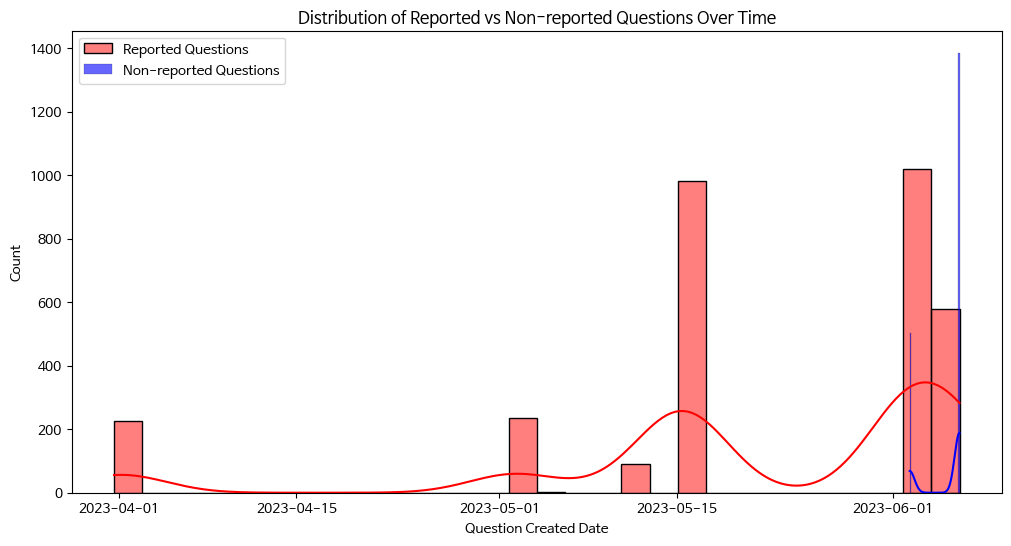

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ïã†Í≥†Îêú ÏßàÎ¨∏Í≥º Ïã†Í≥†ÎêòÏßÄ ÏïäÏùÄ ÏßàÎ¨∏ Î∂ÑÎ¶¨
reported_questions = polls_question[polls_question["id"].isin(polls_questionreport["question_id"])]
non_reported_questions = polls_question[~polls_question["id"].isin(polls_questionreport["question_id"])]

# ÎÇ†ÏßúÎ≥Ñ Ïã†Í≥†Îêú ÏßàÎ¨∏ Ïàò vs Ïã†Í≥†ÎêòÏßÄ ÏïäÏùÄ ÏßàÎ¨∏ Ïàò
reported_questions["created_at"] = pd.to_datetime(reported_questions["created_at"])
non_reported_questions["created_at"] = pd.to_datetime(non_reported_questions["created_at"])

plt.figure(figsize=(12,6))
sns.histplot(reported_questions["created_at"], bins=30, color="red", label="Reported Questions", kde=True)
sns.histplot(non_reported_questions["created_at"], bins=30, color="blue", label="Non-reported Questions", kde=True, alpha=0.6)
plt.xlabel("Question Created Date")
plt.ylabel("Count")
plt.legend()
plt.title("Distribution of Reported vs Non-reported Questions Over Time")
plt.show()


### Ïã†Í≥† ÏÇ¨Ïú†ÏôÄ ÏßàÎ¨∏ ÎÇ¥Ïö© Î∂ÑÏÑù
- > Ïã†Í≥†Îêú ÏßàÎ¨∏Ïùò ÌÖçÏä§Ìä∏Î•º Î∂ÑÏÑùÌïòÏó¨ ÌäπÏ†ï Ïú†ÌòïÏùò ÏßàÎ¨∏Ïù¥ Ïã†Í≥†Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄÏßÄ ÌôïÏù∏

- question_textÏóêÏÑú ÌäπÏ†ï ÌÇ§ÏõåÎìúÍ∞Ä Ïã†Í≥†Îêú ÏßàÎ¨∏Ïóê ÎßéÏù¥ Ìè¨Ìï®ÎêòÎäîÏßÄ ÌôïÏù∏
- Ïã†Í≥† ÏÇ¨Ïú†(reason)ÏôÄ ÏßàÎ¨∏ ÌÖçÏä§Ìä∏ Í∞ÑÏùò Ïó∞Í¥ÄÏÑ± Î∂ÑÏÑù
- ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÎòêÎäî ÌÇ§ÏõåÎìú ÎπàÎèÑ Î∂ÑÏÑù

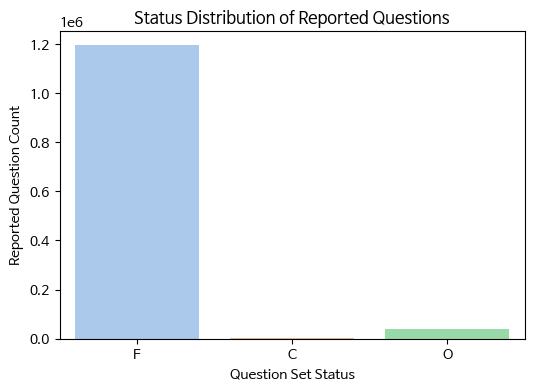

In [ ]:
# Ïã†Í≥†Îêú ÏßàÎ¨∏Í≥º ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏÉÅÌÉú Î≥ëÌï©
polls_questionset["question_piece_id_list"] = polls_questionset["question_piece_id_list"].apply(eval)  # Î¶¨Ïä§Ìä∏ Î≥ÄÌôò
polls_questionpiece_reported = polls_questionpiece[polls_questionpiece["question_id"].isin(polls_questionreport["question_id"])]

# ÏßàÎ¨∏ Ï°∞Í∞Å IDÍ∞Ä Ìè¨Ìï®Îêú ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ï∞æÍ∏∞
question_set_status = polls_questionset.explode("question_piece_id_list").merge(
    polls_questionpiece_reported, left_on="question_piece_id_list", right_on="id", how="inner"
)

# ÏÉÅÌÉúÎ≥Ñ Ïã†Í≥†Îêú ÏßàÎ¨∏ ÎπÑÏú® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6,4))
sns.countplot(data=question_set_status, x="status", palette="pastel")
plt.title("Status Distribution of Reported Questions")
plt.xlabel("Question Set Status")
plt.ylabel("Reported Question Count")
plt.show()


### Ìà¨Ìëú ÏßàÎ¨∏

#### Ìà¨Ìëú Î∞è ÏßàÎ¨∏ Í¥ÄÎ†® Î∂ÑÏÑù

In [ ]:
# ÏßàÎ¨∏Î≥Ñ Ìà¨Ìëú Ï∞∏Ïó¨Ïú®
import pandas as pd

# ÏßàÎ¨∏Î≥Ñ Ìà¨Ìëú Ï∞∏Ïó¨Ïú® Í≥ÑÏÇ∞
question_stats = accounts_userquestionrecord.groupby('question_id').agg(
    total_users=('user_id', 'nunique'),
    voted_users=('chosen_user_id', 'nunique')
).reset_index()

question_stats['vote_rate'] = question_stats['voted_users'] / question_stats['total_users']
question_stats = question_stats.sort_values(by='vote_rate', ascending=False)

print(question_stats)


      question_id  total_users  voted_users  vote_rate
4262         4448            2            3   1.500000
4776         5096            2            3   1.500000
4323         4527            2            3   1.500000
3823         3932            8           11   1.375000
4267         4455            3            4   1.333333
...           ...          ...          ...        ...
3196         3305            9            8   0.888889
3684         3793            9            8   0.888889
2366         2475           25           22   0.880000
3528         3637            8            7   0.875000
3706         3815            7            6   0.857143

[4805 rows x 4 columns]


In [ ]:
#Ïú†Ï†ÄÎ≥Ñ Ìà¨Ìëú Ï∞∏Ïó¨Ïú®
user_stats = accounts_userquestionrecord.groupby('user_id').agg(
    questions_participated=('question_id', 'nunique'),
    votes_made=('chosen_user_id', 'nunique')
).reset_index()

user_stats['avg_votes_per_question'] = user_stats['votes_made'] / user_stats['questions_participated']
user_stats = user_stats.sort_values(by='avg_votes_per_question', ascending=False)

print(user_stats)


      user_id  questions_participated  votes_made  avg_votes_per_question
4848  1583358                       2           2                1.000000
4582  1470620                       3           3                1.000000
2900  1167130                       1           1                1.000000
3037  1185982                       2           2                1.000000
160    850832                       1           1                1.000000
...       ...                     ...         ...                     ...
4783  1546029                     147           2                0.013605
4115  1388911                     199           2                0.010050
1829   952220                    1050          10                0.009524
4131  1401244                     381           2                0.005249
3252  1214232                     692           2                0.002890

[4849 rows x 4 columns]


#### 2. Ïã†Í≥† Í¥ÄÎ†® Î∂ÑÏÑù

In [ ]:
#Ïã†Í≥†Îêú ÏßàÎ¨∏Ïùò Ìà¨ÌëúÏú®
report_vote_stats = accounts_userquestionrecord.groupby('question_id').agg(
    total_users=('user_id', 'nunique'),
    voted_users=('chosen_user_id', 'nunique'),
    total_reports=('report_count', 'sum')
).reset_index()

report_vote_stats['vote_rate'] = report_vote_stats['voted_users'] / report_vote_stats['total_users']
report_vote_stats['report_rate'] = report_vote_stats['total_reports'] / report_vote_stats['total_users']

report_vote_stats = report_vote_stats.sort_values(by='report_rate', ascending=False)

print(report_vote_stats)


      question_id  total_users  voted_users  total_reports  vote_rate  \
1028         1137          298          303             14   1.016779   
882           991          331          354              3   1.069486   
934          1043          223          226              2   1.013453   
1019         1128          228          242              2   1.061404   
1282         1391          324          336              2   1.037037   
...           ...          ...          ...            ...        ...   
1706         1815           27           30              0   1.111111   
1705         1814           29           30              0   1.034483   
1704         1813           37           38              0   1.027027   
1703         1812           24           24              0   1.000000   
4804         5133            3            3              0   1.000000   

      report_rate  
1028     0.046980  
882      0.009063  
934      0.008969  
1019     0.008772  
1282     0.006173  
...

In [ ]:
# ÏßàÎ¨∏ ÏÉÅÌÉú ÎπÑÏú® Î∂ÑÏÑù
status_stats = accounts_userquestionrecord.groupby('status').agg(
    total_count=('question_id', 'count')
).reset_index()

status_stats['percentage'] = status_stats['total_count'] / len(accounts_userquestionrecord) * 100

print(status_stats)


  status  total_count  percentage
0      B          658    0.054043
1      C      1156322   94.970589
2      I        60578    4.975369


In [ ]:
# ÎãµÎ≥Ä ÏÉÅÌÉú Î∂ÑÏÑù
answer_status_stats = accounts_userquestionrecord.groupby('answer_status').agg(
    total_questions=('question_id', 'count')
).reset_index()

answer_status_stats['percentage'] = answer_status_stats['total_questions'] / len(accounts_userquestionrecord) * 100

print(answer_status_stats)


  answer_status  total_questions  percentage
0             A           111761    9.179111
1             N          1097932   90.174924
2             P             7865    0.645965


In [ ]:
# ÎãµÎ≥Ä ÏãúÍ∞Ñ(answer_updated_at)
accounts_userquestionrecord['answer_date'] = pd.to_datetime(accounts_userquestionrecord['answer_updated_at']).dt.date
answer_time_stats = accounts_userquestionrecord[accounts_userquestionrecord['answer_updated_at'].notna()].groupby('answer_date').agg(
    total_answers=('question_id', 'count')
).reset_index()

answer_time_stats = answer_time_stats.sort_values(by='answer_date', ascending=False)

print(answer_time_stats)


    answer_date  total_answers
272  2024-05-08              4
271  2024-05-07             11
270  2024-05-06              8
269  2024-05-05             10
268  2024-05-03              5
..          ...            ...
4    2023-05-02          13618
3    2023-05-01          12249
2    2023-04-30          16137
1    2023-04-29          11401
0    2023-04-28           3170

[273 rows x 2 columns]


### Ïú†Ï†Ä Ï∞∏Ïó¨ ÌñâÎèô Î∂ÑÏÑù
- ÏßàÎ¨∏Î≥Ñ ÌèâÍ∑† opened_times Î∂ÑÏÑù
- Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† opened_times Î∂ÑÏÑù


In [ ]:
#ÏßàÎ¨∏Î≥Ñ ÌèâÍ∑† opened_times Î∂ÑÏÑù
question_opened_stats = accounts_userquestionrecord.groupby('question_id').agg(
    avg_opened_times=('opened_times', 'mean'),
    total_users=('user_id', 'nunique')
).reset_index()

question_opened_stats = question_opened_stats.sort_values(by='avg_opened_times', ascending=False)

print(question_opened_stats)


      question_id  avg_opened_times  total_users
4587         4857               3.0            1
4557         4823               3.0            1
4378         4592               3.0            1
4735         5046               3.0            1
4608         4883               2.0            1
...           ...               ...          ...
3435         3544               0.0            9
3434         3543               0.0            8
3433         3542               0.0           13
3432         3541               0.0            7
4804         5133               0.0            3

[4805 rows x 3 columns]


In [ ]:
#Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† opened_times Î∂ÑÏÑù
user_opened_stats = accounts_userquestionrecord.groupby('user_id').agg(
    avg_opened_times=('opened_times', 'mean'),
    total_questions=('question_id', 'count')
).reset_index()

user_opened_stats = user_opened_stats.sort_values(by='avg_opened_times', ascending=False)

print(user_opened_stats)


      user_id  avg_opened_times  total_questions
2124  1041814          1.000000                2
4777  1543664          1.000000                1
3417  1237618          0.857143                7
1824   951022          0.666667                3
416    865649          0.666667                3
...       ...               ...              ...
3223  1210903          0.000000                5
3175  1206675          0.000000               31
3150  1203090          0.000000               65
3147  1202627          0.000000                5
4848  1583358          0.000000                2

[4849 rows x 3 columns]


In [ ]:
import pandas as pd



# ÎèôÏùºÌïú Ìà¨Ìëú(question_piece_id)Ïóê ÎåÄÌï¥ ÏÑ†ÌÉùÎêú Ïú†Ï†Ä(chosen_user_id)Ïùò Ïàò Í≥ÑÏÇ∞
vote_candidates = accounts_userquestionrecord.groupby('question_id')['user_id'].nunique().reset_index()

# Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Î™ÖÌôïÌûà ÌïòÍ∏∞ ÏúÑÌï¥ 'candidates_count'Î°ú Î≥ÄÍ≤Ω
vote_candidates.rename(columns={'user_id': 'user_id'}, inplace=True)

# Í≤∞Í≥º ÌôïÏù∏
print(vote_candidates)


      question_id  user_id
0              99     1243
1             100     1247
2             101     1308
3             102     1397
4             103     1214
...           ...      ...
4800         5129        3
4801         5130        1
4802         5131        2
4803         5132        1
4804         5133        3

[4805 rows x 2 columns]


In [ ]:
import pandas as pd



# ÎèôÏùºÌïú Ìà¨Ìëú(question_piece_id)Ïóê ÎåÄÌï¥ ÏÑ†ÌÉùÎêú Ïú†Ï†Ä(chosen_user_id)Ïùò Ïàò Í≥ÑÏÇ∞
vote_candidates = accounts_userquestionrecord.groupby('question_id')['chosen_user_id'].nunique().reset_index()

# Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Î™ÖÌôïÌûà ÌïòÍ∏∞ ÏúÑÌï¥ 'candidates_count'Î°ú Î≥ÄÍ≤Ω
vote_candidates.rename(columns={'chosen_user_id': 'candidate'}, inplace=True)

# Í≤∞Í≥º ÌôïÏù∏
print(vote_candidates)


      question_id  candidate
0              99       1373
1             100       1301
2             101       1324
3             102       1453
4             103       1292
...           ...        ...
4800         5129          3
4801         5130          1
4802         5131          2
4803         5132          1
4804         5133          3

[4805 rows x 2 columns]


ÌïòÎÇòÏùò question_idÏóê ÎåÄÌï¥ÏÑú

Ï¥ù Ìà¨Ìëú Ìïú ÏÇ¨ÎûåÏùò Ïàò < Ìà¨Ìëú ÌõÑÎ≥¥ÏûêÎ°ú Ïò¨ÎùºÏò® ÏÇ¨ÎûåÎì§Ïùò Ïàò

In [ ]:
import pandas as pd


# Í≤∞Ï†ú Ïú†Ï†ÄÏôÄ ÎπÑÍ≤∞Ï†ú Ïú†Ï†Ä Íµ¨Î∂Ñ (statusÍ∞Ä 1Ïù¥Î©¥ Í≤∞Ï†úÌïú Ïú†Ï†Ä)
paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == 1]
non_paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == 0]

# Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† ÎπÑÍµê
comparison = accounts_userquestionrecord.groupby("status").agg({
    "opened_times": "mean",  # ÌèâÍ∑† Ïó¥Ïñ¥Î≥∏ ÌöüÏàò
    "question_id": "nunique",  # Ï∞∏Ïó¨Ìïú ÏßàÎ¨∏ Ïàò
    "question_piece_id": "nunique",  # Ï∞∏Ïó¨Ìïú Ìà¨Ìëú Ïàò
    "report_count": "mean",  # Ïã†Í≥† ÌöüÏàò ÌèâÍ∑†
    "has_read": "mean"  # ÏùΩÏùÄ ÎπÑÏú®
}).rename(columns={"question_id": "unique_questions", "question_piece_id": "unique_votes"})

print("Í≤∞Ï†ú vs ÎπÑÍ≤∞Ï†ú Ïú†Ï†Ä ÎπÑÍµê:\n", comparison)

# Í≤∞Ï†ú Ïú†Ï†ÄÎì§Ïùò Ìà¨Ìëú ÌôúÎèô Î∂ÑÏÑù
paid_votes = paid_users["question_piece_id"].value_counts()
print("Í≤∞Ï†ú Ïú†Ï†ÄÎì§Ïùò Ïù∏Í∏∞ Ìà¨Ìëú ID:\n", paid_votes.head(10))


Í≤∞Ï†ú vs ÎπÑÍ≤∞Ï†ú Ïú†Ï†Ä ÎπÑÍµê:
         opened_times  unique_questions  unique_votes  report_count  has_read
status                                                                      
B           0.182371               445           658      0.003040  0.504559
C           0.000000              4790       1156322      0.000106  0.535015
I           1.270791              2959         60578      0.001486  0.940094
Í≤∞Ï†ú Ïú†Ï†ÄÎì§Ïùò Ïù∏Í∏∞ Ìà¨Ìëú ID:
 Series([], Name: count, dtype: int64)


### Í≤∞Ï†úÏú® Ï¶ùÍ∞Ä Î∞©Î≤ï
- ÎπÑÍ≤∞Ï†ú Ïú†Ï†ÄÏóêÍ≤å Ïù∏Í∏∞ ÏßàÎ¨∏ ÎÖ∏Ï∂ú
Í∞ÄÏÑ§ : Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§ÏùÄ Ïù∏Í∏∞ÎßéÏùÄ ÏßàÎ¨∏Ïóê ÎåÄÌïú ÎÖ∏Ï∂úÏù¥ ÎßéÏïòÏùÑ Í≤ÉÏù¥Îã§ (Í≤∞Ï†úÌïú ÏßàÎ¨∏ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ Ïù∏Í∏∞ÏûàÎçò ÏßàÎ¨∏Ïùº Í≤ÉÏù¥Îã§. )


In [ ]:
import pandas as pd

# üîπ ÏßàÎ¨∏Î≥Ñ Ìà¨Ìëú ÌöüÏàò ÏßëÍ≥Ñ (question_id Í∏∞Ï§Ä)
question_stats = accounts_userquestionrecord.groupby("question_id").agg({
    "question_piece_id": "count",  # Ìà¨Ìëú ÌöüÏàò (Ìï¥Îãπ ÏßàÎ¨∏Ïóê ÎåÄÌïú Ìà¨Ìëú Í∞úÏàò)
    "opened_times": "sum"  # Ìï¥Îãπ ÏßàÎ¨∏Ïù¥ Ïó¥Î¶∞ ÌöüÏàò
}).reset_index()

# üîπ Ïù∏Í∏∞ ÏßàÎ¨∏ Í∏∞Ï§Ä (Ìà¨Ìëú ÌöüÏàò ÏÉÅÏúÑ 20%)
top_20_percentile = question_stats["question_piece_id"].quantile(0.8)  # ÏÉÅÏúÑ 20% Í∏∞Ï§ÄÍ∞í
popular_questions = question_stats[question_stats["question_piece_id"] >= top_20_percentile]["question_id"]

# üîπ Ïú†Ï†ÄÎ≥Ñ Ïù∏Í∏∞ ÏßàÎ¨∏ ÎÖ∏Ï∂ú Ïó¨Î∂Ä ÌôïÏù∏
accounts_userquestionrecord["is_popular_question"] = accounts_userquestionrecord["question_id"].isin(popular_questions)

# üîπ Í≤∞Ï†úÌïú Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ (status == 1)
paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] != "C"]
non_paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == "C"]

# üîπ Í≤∞Ï†ú Ïú†Ï†ÄÏôÄ ÎπÑÍ≤∞Ï†ú Ïú†Ï†ÄÏùò Ïù∏Í∏∞ ÏßàÎ¨∏ ÎÖ∏Ï∂ú ÎπÑÏú® ÎπÑÍµê
comparison_df = pd.DataFrame({
    "category": ["Paid Users", "Non-Paid Users"],
    "popular_question_exposure": [
        paid_users["is_popular_question"].mean(),   # Í≤∞Ï†úÌïú Ïú†Ï†ÄÍ∞Ä Ïù∏Í∏∞ ÏßàÎ¨∏ÏùÑ Î≥∏ ÎπÑÏú®
        non_paid_users["is_popular_question"].mean()  # ÎπÑÍ≤∞Ï†ú Ïú†Ï†ÄÍ∞Ä Ïù∏Í∏∞ ÏßàÎ¨∏ÏùÑ Î≥∏ ÎπÑÏú®
    ]
})

print(comparison_df)


         category  popular_question_exposure
0      Paid Users                   0.769923
1  Non-Paid Users                   0.805928


ÌôïÏù∏Í≤∞Í≥º Í≤∞Ï†úÌïú ÏÇ¨ÎûåÎì§Ïù¥ Ïù∏Í∏∞ÏûàÎäî ÏßàÎ¨∏Ïóê Îçî ÎßéÏù¥ Ï†ëÍ∑ºÌñàÏùÑÍ≤ÉÏù¥Îã§. ÎùºÍ≥† Î≥¥Í∏∞ÏóêÎäî Ïñ¥Î†§Ïö∏ÎìØÌï®.

>> Í≤∞Ï†úÌïú ÏßàÎ¨∏Ïù¥ Ïù∏Í∏∞ ÏûàÎäî ÏßàÎ¨∏Ïù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê


In [ ]:
# üîπ Í≤∞Ï†úÎêú ÏßàÎ¨∏ ÌïÑÌÑ∞ÎßÅ (status == 1)
paid_questions = accounts_userquestionrecord[accounts_userquestionrecord["status"] == "I"]["question_id"].unique()

# üîπ Ï†ÑÏ≤¥ ÏßàÎ¨∏ Î™©Î°ù
all_questions = accounts_userquestionrecord["question_id"].unique()

# üîπ Í≤∞Ï†úÎêú ÏßàÎ¨∏Ïù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ ÌõÑ Ï≤òÎ¶¨
if len(paid_questions) > 0:
    paid_popular_ratio = sum(pd.Series(paid_questions).isin(popular_questions)) / len(paid_questions)
else:
    paid_popular_ratio = 0  # Í≤∞Ï†úÎêú ÏßàÎ¨∏Ïù¥ ÏóÜÏùÑ Í≤ΩÏö∞ 0ÏúºÎ°ú ÏÑ§Ï†ï

# üîπ Ï†ÑÏ≤¥ ÏßàÎ¨∏ÏóêÏÑú Ïù∏Í∏∞ ÏßàÎ¨∏ ÎπÑÏú® Í≥ÑÏÇ∞
if len(all_questions) > 0:
    overall_popular_ratio = sum(pd.Series(all_questions).isin(popular_questions)) / len(all_questions)
else:
    overall_popular_ratio = 0  # Ï†ÑÏ≤¥ ÏßàÎ¨∏Ïù¥ ÏóÜÏùÑ Í≤ΩÏö∞ 0ÏúºÎ°ú ÏÑ§Ï†ï

# üîπ Í≤∞Í≥º Ï†ïÎ¶¨
popularity_comparison = pd.DataFrame({
    "category": ["Paid Questions", "All Questions"],
    "popular_question_ratio": [paid_popular_ratio, overall_popular_ratio]
})

print(popularity_comparison)


         category  popular_question_ratio
0  Paid Questions                0.330179
1   All Questions                0.203330


In [ ]:
print("Í≤∞Ï†úÎêú ÏßàÎ¨∏ Í∞úÏàò:", len(paid_questions))


Í≤∞Ï†úÎêú ÏßàÎ¨∏ Í∞úÏàò: 2959


In [ ]:
import pandas as pd

# ÏπúÍµ¨ ÏöîÏ≤≠ ÌÖåÏù¥Î∏î
# ÏòàÏãúÎ°ú 'accounts_friendrequest' DataFrameÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

# 1. Î∞õÏùÄ ÏπúÍµ¨ Ïàò Í≥ÑÏÇ∞ (receive_user_id Í∏∞Ï§Ä)
received_friends = accounts_friendrequest[accounts_friendrequest["status"] == "A"]['receive_user_id'].value_counts().reset_index()
received_friends.columns = ['user_id', 'received_friends']

# 2. Î≥¥ÎÇ∏ ÏπúÍµ¨ Ïàò Í≥ÑÏÇ∞ (send_user_id Í∏∞Ï§Ä)
sent_friends = accounts_friendrequest[accounts_friendrequest["status"] == "A"]['send_user_id'].value_counts().reset_index()
sent_friends.columns = ['user_id', 'sent_friends']

# 3. Îëê Í∞úÏùò ÏπúÍµ¨ ÏàòÎ•º Ìï©ÏπòÍ∏∞
friends_count = pd.merge(received_friends, sent_friends, on='user_id', how='outer').fillna(0)

# 4. ÏπúÍµ¨ Ïàò Ìï©ÏÇ∞ (Î∞õÏùÄ ÏπúÍµ¨ + Î≥¥ÎÇ∏ ÏπúÍµ¨)
friends_count['total_friends'] = friends_count['received_friends'] + friends_count['sent_friends']

# Í≤∞Í≥º ÌôïÏù∏
print(friends_count.head())


   user_id  received_friends  sent_friends  total_friends
0   831962               0.0           1.0            1.0
1   832151               6.0           2.0            8.0
2   832340               4.0           7.0           11.0
3   833024              35.0           1.0           36.0
4   833041              21.0           8.0           29.0


In [ ]:
# CSVÎ°ú Ï†ÄÏû•
friends_count.to_csv("friends_count.csv", index=False)

# ÌååÏùº Í≤ΩÎ°ú ÌôïÏù∏
print("CSV ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


CSV ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [ ]:
import pandas as pd

# 1. Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§ Ï∂îÏ∂ú (status == "I")
paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == "I"]
paid_users = paid_users["user_id"].unique()  # Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§Ïùò user_id Î¶¨Ïä§Ìä∏

# 2. ÏπúÍµ¨ Ïàò Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤∞Ï†ú Ïó¨Î∂Ä Í≤∞Ìï©
friends_count["is_paid_user"] = friends_count["user_id"].apply(lambda x: 1 if x in paid_users else 0)

# 3. Í≤∞Ï†ú Ïó¨Î∂ÄÏôÄ ÏπúÍµ¨ Ïàò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
# - Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§Ïùò ÏπúÍµ¨ Ïàò ÌèâÍ∑†
paid_avg_friends = friends_count[friends_count["is_paid_user"] == 1]["total_friends"].mean()
# - Í≤∞Ï†úÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎì§Ïùò ÏπúÍµ¨ Ïàò ÌèâÍ∑†
non_paid_avg_friends = friends_count[friends_count["is_paid_user"] == 0]["total_friends"].mean()

# 4. Í≤∞Ï†ú Ïó¨Î∂ÄÏôÄ ÏπúÍµ¨ Ïàò Í∞ÑÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Î∂ÑÏÑù (ÌîºÏñ¥Ïä® ÏÉÅÍ¥Ä Í≥ÑÏàò)
correlation = friends_count["total_friends"].corr(friends_count["is_paid_user"])

# 5. Í≤∞Í≥º Ï∂úÎ†•
print(f"Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§Ïùò ÌèâÍ∑† ÏπúÍµ¨ Ïàò: {paid_avg_friends}")
print(f"Í≤∞Ï†úÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎì§Ïùò ÌèâÍ∑† ÏπúÍµ¨ Ïàò: {non_paid_avg_friends}")
print(f"Í≤∞Ï†ú Ïó¨Î∂ÄÏôÄ ÏπúÍµ¨ ÏàòÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ: {correlation}")


Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§Ïùò ÌèâÍ∑† ÏπúÍµ¨ Ïàò: 47.110865724381625
Í≤∞Ï†úÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎì§Ïùò ÌèâÍ∑† ÏπúÍµ¨ Ïàò: 39.55626239835478
Í≤∞Ï†ú Ïó¨Î∂ÄÏôÄ ÏπúÍµ¨ ÏàòÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ: 0.022657458052373108


ÎäêÎ¶∞ ÏΩîÎìú

In [ ]:
import pandas as pd
from datetime import timedelta

# friend_id_listÎäî ÏâºÌëúÎ°ú Íµ¨Î∂ÑÎêú Î¨∏ÏûêÏó¥Î°ú Í∞ÄÏ†ï
#accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(lambda x: x.split(','))

# 2. accounts_paymenthistoryÏóêÏÑú Í≤∞Ï†ú Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
# Í≤∞Ï†ú ÏãúÍ∞Ñ ÌååÏã±
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 3. Ïú†Ï†Ä Í≤∞Ï†ú ÌõÑ 10Î∂Ñ Ïù¥ÎÇ¥Ïóê ÏπúÍµ¨Îì§ Í≤∞Ï†ú Ïó¨Î∂Ä ÌôïÏù∏ÌïòÍ∏∞
# Í∞Å Í≤∞Ï†ú ÌõÑ 10Î∂Ñ Ïù¥ÎÇ¥Ïóê ÏπúÍµ¨Îì§Ïù¥ Í≤∞Ï†úÌïú Í≤ΩÏö∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú Í≤∞Í≥º Î¶¨Ïä§Ìä∏
result = []

for _, user_row in accounts_paymenthistory.iterrows():
    user_id = user_row['user_id']
    payment_time = user_row['created_at']

    # Ìï¥Îãπ Ïú†Ï†ÄÏùò ÏπúÍµ¨ Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list'].values[0]

    # ÏπúÍµ¨Îì§Ïù¥ Í≤∞Ï†úÌïú Í∏∞Î°ù ÌïÑÌÑ∞ÎßÅ
    friends_payment = accounts_paymenthistory[
        accounts_paymenthistory['user_id'].isin(friends) &
        (accounts_paymenthistory['created_at'] >= payment_time) &
        (accounts_paymenthistory['created_at'] <= payment_time + timedelta(days=7))
    ]

    # Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§ Ïàò Ïπ¥Ïö¥Ìä∏
    result.append(len(friends_payment))

# 4. Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò Ïπ¥Ïö¥Ìä∏
num_friends_paid = sum(result)
print(f"Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: {num_friends_paid}")


Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: 0


Îπ†Î•∏ ÏΩîÎìú

In [ ]:
import pandas as pd
from datetime import timedelta

# 1Ô∏è‚É£ Í≤∞Ï†ú ÌÖåÏù¥Î∏î Î°úÎìú Î∞è ÏãúÍ∞Ñ Î≥ÄÌôò
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2Ô∏è‚É£ Ïú†Ï†ÄÎ≥Ñ Í≤∞Ï†ú ÏãúÍ∞Ñ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± (Îçî Îπ†Î•∏ Ï°∞ÌöåÎ•º ÏúÑÌï¥)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3Ô∏è‚É£ ÏπúÍµ¨ Î™©Î°ùÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)

# 4Ô∏è‚É£ Í≤∞Ï†úÌïú Ïú†Ï†Ä Î™©Î°ùÎßå Í∞ÄÏ†∏Ïò§Í∏∞
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5Ô∏è‚É£ Í≤∞Ï†úÌïú ÏπúÍµ¨ ÌôïÏù∏ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
result = []

# 6Ô∏è‚É£ Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú ÏπúÍµ¨ Í≤∞Ï†ú Ïó¨Î∂Ä ÌôïÏù∏
for user_id, payment_times in user_payment_dict.items():
    # Ìï¥Îãπ Ïú†Ï†ÄÏùò ÏπúÍµ¨ Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if len(friends) == 0:
        continue  # ÏπúÍµ¨ Î™©Î°ùÏù¥ ÏóÜÎäî Í≤ΩÏö∞ Ïä§ÌÇµ

    friends = friends.values[0]  # Ïã§Ï†ú Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
    friends = list(map(int, friends))  # Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò

    # Í≤∞Ï†úÌïú ÏπúÍµ¨Îßå ÌïÑÌÑ∞ÎßÅ
    paying_friends = [f for f in friends if f in paid_users]

    # ÏπúÍµ¨ Í≤∞Ï†ú ÏãúÍ∞Ñ ÌôïÏù∏
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends
        )
        result.append(count)

# 7Ô∏è‚É£ ÏµúÏ¢Ö Í≤∞Ï†úÌïú ÏπúÍµ¨ Ïàò Ï∂úÎ†•
num_friends_paid = sum(result)
print(f"Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: {num_friends_paid}")


ValueError: invalid literal for int() with base 10: '[841345'

In [ ]:
import pandas as pd
from datetime import timedelta

# 1Ô∏è‚É£ Í≤∞Ï†ú ÌÖåÏù¥Î∏î Î°úÎìú Î∞è ÏãúÍ∞Ñ Î≥ÄÌôò
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2Ô∏è‚É£ Ïú†Ï†ÄÎ≥Ñ Í≤∞Ï†ú ÏãúÍ∞Ñ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± (Îçî Îπ†Î•∏ Ï°∞ÌöåÎ•º ÏúÑÌï¥)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3Ô∏è‚É£ ÏπúÍµ¨ Î™©Î°ùÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò (Ïó¨Í∏∞ÏÑú Î∂àÌïÑÏöîÌïú Î¨∏Ïûê Ï†úÍ±∞)
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(
    lambda x: [int(i.strip()) for i in x.strip('[]').split(',')] if isinstance(x, str) else []
)

# 4Ô∏è‚É£ Í≤∞Ï†úÌïú Ïú†Ï†Ä Î™©Î°ùÎßå Í∞ÄÏ†∏Ïò§Í∏∞
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5Ô∏è‚É£ Í≤∞Ï†úÌïú ÏπúÍµ¨ ÌôïÏù∏ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
result = []

# 6Ô∏è‚É£ Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú ÏπúÍµ¨ Í≤∞Ï†ú Ïó¨Î∂Ä ÌôïÏù∏
for user_id, payment_times in user_payment_dict.items():
    # Ìï¥Îãπ Ïú†Ï†ÄÏùò ÏπúÍµ¨ Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if len(friends) == 0:
        continue  # ÏπúÍµ¨ Î™©Î°ùÏù¥ ÏóÜÎäî Í≤ΩÏö∞ Ïä§ÌÇµ

    friends = friends.values[0]  # Ïã§Ï†ú Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞

    # Í≤∞Ï†úÌïú ÏπúÍµ¨Îßå ÌïÑÌÑ∞ÎßÅ
    paying_friends = [f for f in friends if f in paid_users]

    # ÏπúÍµ¨ Í≤∞Ï†ú ÏãúÍ∞Ñ ÌôïÏù∏
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends
        )
        result.append(count)

# 7Ô∏è‚É£ ÏµúÏ¢Ö Í≤∞Ï†úÌïú ÏπúÍµ¨ Ïàò Ï∂úÎ†•
num_friends_paid = sum(result)
print(f"Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: {num_friends_paid}")
import pandas as pd
from datetime import timedelta

# 1Ô∏è‚É£ Í≤∞Ï†ú ÌÖåÏù¥Î∏î Î°úÎìú Î∞è ÏãúÍ∞Ñ Î≥ÄÌôò
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2Ô∏è‚É£ Ïú†Ï†ÄÎ≥Ñ Í≤∞Ï†ú ÏãúÍ∞Ñ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± (Îçî Îπ†Î•∏ Ï°∞ÌöåÎ•º ÏúÑÌï¥)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3Ô∏è‚É£ ÏπúÍµ¨ Î™©Î°ùÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò (Ïó¨Í∏∞ÏÑú Î∂àÌïÑÏöîÌïú Î¨∏Ïûê Ï†úÍ±∞)
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(
    lambda x: [int(i.strip()) for i in x.strip('[]').split(',')] if isinstance(x, str) else []
)

# 4Ô∏è‚É£ Í≤∞Ï†úÌïú Ïú†Ï†Ä Î™©Î°ùÎßå Í∞ÄÏ†∏Ïò§Í∏∞
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5Ô∏è‚É£ Í≤∞Ï†úÌïú ÏπúÍµ¨ ÌôïÏù∏ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
result = []

# 6Ô∏è‚É£ Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú ÏπúÍµ¨ Í≤∞Ï†ú Ïó¨Î∂Ä ÌôïÏù∏
for user_id, payment_times in user_payment_dict.items():
    # Ìï¥Îãπ Ïú†Ï†ÄÏùò ÏπúÍµ¨ Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if len(friends) == 0:
        continue  # ÏπúÍµ¨ Î™©Î°ùÏù¥ ÏóÜÎäî Í≤ΩÏö∞ Ïä§ÌÇµ

    friends = friends.values[0]  # Ïã§Ï†ú Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞

    # Í≤∞Ï†úÌïú ÏπúÍµ¨Îßå ÌïÑÌÑ∞ÎßÅ
    paying_friends = [f for f in friends if f in paid_users]

    # ÏπúÍµ¨ Í≤∞Ï†ú ÏãúÍ∞Ñ ÌôïÏù∏
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends
        )
        result.append(count)

# 7Ô∏è‚É£ ÏµúÏ¢Ö Í≤∞Ï†úÌïú ÏπúÍµ¨ Ïàò Ï∂úÎ†•
num_friends_paid = sum(result)
print(f"Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: {num_friends_paid}")


Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: 0
Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: 0


Í≤∞Ï†úÌïú ÏÇ¨Îûå Ï§ë ÏπúÍµ¨ÎèÑ Í≤∞Ï†úÌïú Í≤ΩÏö∞

In [ ]:
import pandas as pd
from datetime import timedelta


# 1Ô∏è‚É£ Í≤∞Ï†ú ÌÖåÏù¥Î∏î Î°úÎìú Î∞è ÏãúÍ∞Ñ Î≥ÄÌôò
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2Ô∏è‚É£ Ïú†Ï†ÄÎ≥Ñ Í≤∞Ï†ú ÏãúÍ∞Ñ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± (Îçî Îπ†Î•∏ Ï°∞ÌöåÎ•º ÏúÑÌï¥)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3Ô∏è‚É£ ÏπúÍµ¨ Î™©Î°ùÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò (NaN, Îπà Í∞í Ï≤òÎ¶¨ Ï∂îÍ∞Ä)
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].fillna('').apply(
    lambda x: [int(i.strip()) for i in x.strip('[]').split(',') if i.strip().isdigit()] if isinstance(x, str) and x else []
)

# 4Ô∏è‚É£ Í≤∞Ï†úÌïú Ïú†Ï†Ä Î™©Î°ùÎßå Í∞ÄÏ†∏Ïò§Í∏∞ (set ÏÇ¨Ïö©)
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5Ô∏è‚É£ Í≤∞Ï†úÌïú ÏπúÍµ¨ ÌôïÏù∏ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
result = []

# 6Ô∏è‚É£ Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú ÏπúÍµ¨ Í≤∞Ï†ú Ïó¨Î∂Ä ÌôïÏù∏
for user_id, payment_times in user_payment_dict.items():
    # Ìï¥Îãπ Ïú†Ï†ÄÏùò ÏπúÍµ¨ Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if friends.empty:
        continue  # ÏπúÍµ¨ Î™©Î°ùÏù¥ ÏóÜÎäî Í≤ΩÏö∞ Ïä§ÌÇµ

    friends = friends.values[0]  # Ïã§Ï†ú Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞

    # Í≤∞Ï†úÌïú ÏπúÍµ¨Îßå ÌïÑÌÑ∞ÎßÅ
    paying_friends = [f for f in friends if f in paid_users]

    # ÏπúÍµ¨ Í≤∞Ï†ú ÏãúÍ∞Ñ ÌôïÏù∏
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends if friend_id in user_payment_dict
        )
        result.append(count)

# 7Ô∏è‚É£ ÏµúÏ¢Ö Í≤∞Ï†úÌïú ÏπúÍµ¨ Ïàò Ï∂úÎ†•
num_friends_paid = sum(result)
print(f"Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: {num_friends_paid}")

Í≤∞Ï†úÌïú ÏπúÍµ¨Îì§Ïùò Ïàò: 0


In [ ]:
accounts_paymenthistory.head()

id  productId phone_type          created_at  user_id  paid
0   6  heart.777          A 2023-05-13 21:28:34  1211127     1
1   7  heart.777          A 2023-05-13 21:29:39  1151343     1
2   8  heart.777          A 2023-05-13 21:31:33  1002147     1
3   9  heart.777          A 2023-05-13 21:31:39  1095040     1
4  11  heart.777          A 2023-05-13 21:34:32  1164081     1

In [ ]:
import pandas as pd
import scipy.stats as stats

# Í≤∞Ï†ú Ïó¨Î∂Ä Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
accounts_paymenthistory['paid'] = 1  # Í≤∞Ï†úÌïú Ïú†Ï†ÄÎäî 1
paid_users = accounts_paymenthistory[['user_id', 'paid']].drop_duplicates()

# accounts_user ÌÖåÏù¥Î∏îÍ≥º Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Í≤∞Ìï©
merged_df = accounts_user.merge(paid_users, left_on='id', right_on='user_id', how='left').fillna({'paid': 0})

# Ìë∏Ïãú ÏïåÎ¶º Ïó¨Î∂ÄÎ≥Ñ Í≤∞Ï†ú ÌöüÏàò ÏßëÍ≥Ñ
contingency_table = pd.crosstab(merged_df['is_push_on'], merged_df['paid'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Í≤∞Í≥º Ï∂úÎ†•
print("Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ:", chi2)
print("p-value:", p)

# Í≤∞Î°† ÎèÑÏ∂ú
if p < 0.05:
    print("Ìë∏Ïãú ÏïåÎ¶ºÍ≥º Í≤∞Ï†ú Ï†ÑÌôò ÏÇ¨Ïù¥Ïóê Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùå.")
else:
    print("Ìë∏Ïãú ÏïåÎ¶ºÍ≥º Í≤∞Ï†ú Ï†ÑÌôò ÏÇ¨Ïù¥Ïóê Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÏùå.")


Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 536.9823791192532
p-value: 8.54895323433843e-119
Ìë∏Ïãú ÏïåÎ¶ºÍ≥º Í≤∞Ï†ú Ï†ÑÌôò ÏÇ¨Ïù¥Ïóê Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùå.


### school


In [ ]:
accounts_school.head()

id   address  student_count school_type
0   4  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            239           H
1   5  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            160           M
2   6  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            200           H
3   7  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            114           H
4   8  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            139           M

In [ ]:
accounts_user.head()

id  is_superuser  is_staff gender  point  \
0  831956             1         1    NaN    600   
1  831962             0         0      F   2248   
2  832151             0         0      M   1519   
3  832340             0         0      F     57   
4  832520             0         0      M   1039   

                                      friend_id_list  is_push_on  \
0  [1292473, 913158, 1488461, 1064695, 1043565, 1...           0   
1  [833025, 832642, 982531, 879496, 838541, 83752...           1   
2  [838785, 982531, 882567, 879496, 838541, 83649...           0   
3  [841345, 982531, 838785, 963714, 882567, 83252...           1   
4  [874050, 849763, 874212, 844297, 838541, 84004...           0   

            created_at block_user_id_list hide_user_id_list ban_status  \
0  2023-03-29 03:44:14                 []                []          N   
1  2023-03-29 05:18:56                 []                []          N   
2  2023-03-29 12:56:34                 []                []          N   
3  2023-03-29 12:56:35                 []                []          N   
4  2023-03-29 12:56:35                 []                []          N   

   report_count  alarm_count  pending_chat  pending_votes  group_id  
0             0            0             0              0       NaN  
1           253        40878          5499            110      12.0  
2             0           37             0             47       1.0  
3             0           19             0             21       1.0  
4             0           29             0             15      12.0

In [ ]:
accounts_group.head()

id  grade  class_num  school_id
0   1      1          1          1
1   8      3          2          1
2   9      3          3          1
3  10      2          2          1
4  11      2          3          1

## Î≥¥Í≥†ÏÑúÏö© ÏãúÍ∞ÅÌôî

ÌòÑÏû¨ ÏÑúÎπÑÏä§Îäî ÏàòÏã≠Îßå DAU(ÏµúÍ≥† 37Îßå)Î•º Í∏∞Î°ùÌïòÍ≥† ÏûàÏßÄÎßå, Í≤∞Ï†ú Ï†ÑÌôòÏú®ÏùÄ 4%Ïóê Î∂àÍ≥ºÌïòÎã§.

-

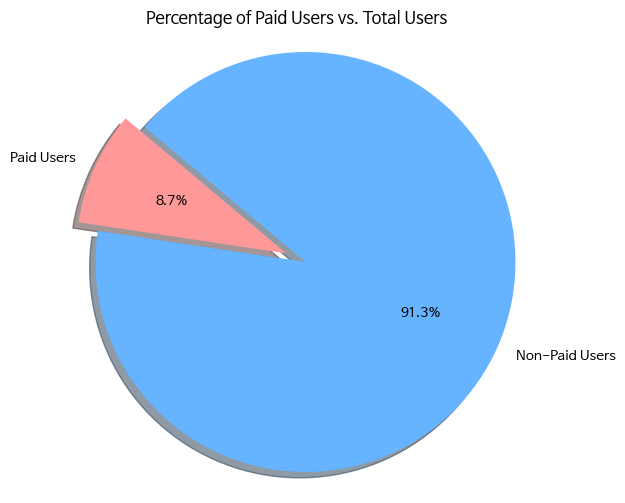

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Í≤∞Ï†úÌïú Ïú†Ï†Ä Í≥ÑÏÇ∞ (Í≤∞Ï†ú Í∏∞Î°ùÏù¥ ÏûàÎäî Ïú†Ï†ÄÎßå Ï∂îÏ∂ú)
paid_users = set(accounts_paymenthistory['user_id'])

# Ï†ÑÏ≤¥ Ïú†Ï†Ä ÏàòÏôÄ Í≤∞Ï†úÌïú Ïú†Ï†Ä Ïàò
total_users = accounts_user['id'].nunique()
paid_user_count = len(paid_users)

# Í≤∞Ï†úÌïú Ïú†Ï†Ä ÎπÑÏú® Í≥ÑÏÇ∞
paid_user_ratio = paid_user_count / total_users

# ÏãúÍ∞ÅÌôî (ÌååÏù¥ Ï∞®Ìä∏ ÏòàÏãú)
labels = ['Paid Users', 'Non-Paid Users']
sizes = [paid_user_count, total_users - paid_user_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Ï≤´ Î≤àÏß∏ Ï°∞Í∞ÅÏùÑ Í∞ïÏ°∞

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Paid Users vs. Total Users')
plt.axis('equal')  # ÏõêÏùÑ Îë•Í∏ÄÍ≤å ÌëúÏãú
plt.show()


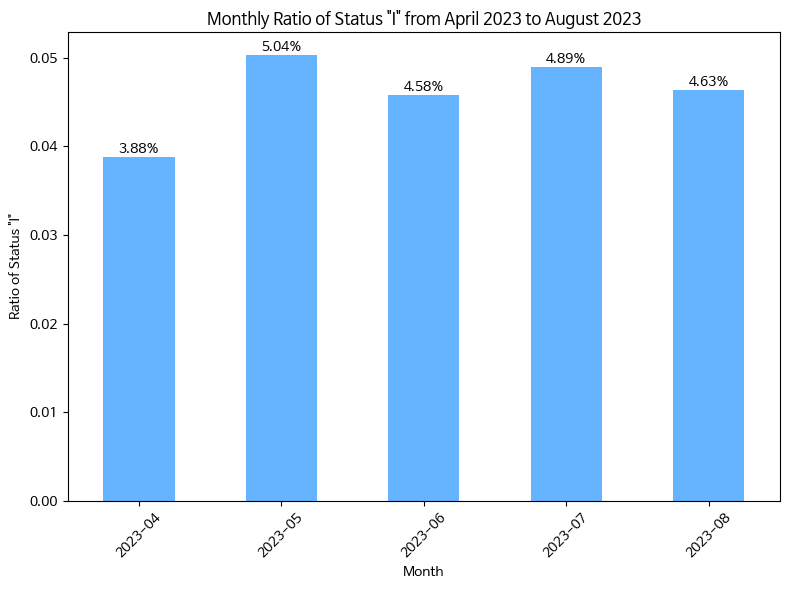

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'created_at' Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
accounts_userquestionrecord['created_at'] = pd.to_datetime(accounts_userquestionrecord['created_at'])

# 2023ÎÖÑ 4ÏõîÎ∂ÄÌÑ∞ 8ÏõîÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
filtered_data = accounts_userquestionrecord[
    (accounts_userquestionrecord['created_at'].dt.year == 2023) &
    (accounts_userquestionrecord['created_at'].dt.month >= 4) &
    (accounts_userquestionrecord['created_at'].dt.month <= 8)
]

# ÏõîÎ≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ Ï†ÑÏ≤¥ statusÏôÄ status = "I"Ïù∏ Í±¥Ïàò Í≥ÑÏÇ∞
total_status_count = filtered_data.groupby(filtered_data['created_at'].dt.to_period('M')).size()
i_status_count = filtered_data[filtered_data['status'] == 'I'].groupby(filtered_data['created_at'].dt.to_period('M')).size()

# status = "I"Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
i_status_ratio = i_status_count / total_status_count

# ÏãúÍ∞ÅÌôî (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(8,6))
ax = i_status_ratio.plot(kind='bar', color='#66b3ff')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÌçºÏÑºÌä∏ Í∞í Ï∂îÍ∞Ä
for i, value in enumerate(i_status_ratio):
    ax.text(i, value , f'{value:.2%}', ha='center', va='bottom', fontsize=10)

# Ï†úÎ™©Í≥º ÎùºÎ≤® ÏÑ§Ï†ï
plt.title('Monthly Ratio of Status "I" from April 2023 to August 2023')
plt.xlabel('Month')
plt.ylabel('Ratio of Status "I"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


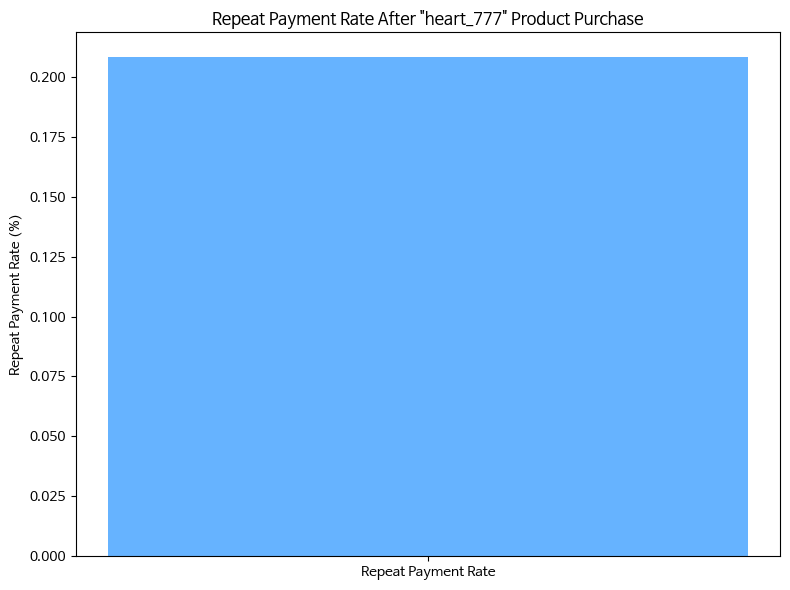

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ÏòàÏãú: accounts_paymenthistory Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÌïÑÏöî)
# 'created_at'ÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# Ïú†Ï†ÄÎ≥Ñ Ï≤´ Í≤∞Ï†ú ÎÇ†Ïßú Ï∂îÏ∂ú
first_payment_date = accounts_paymenthistory.groupby('user_id')['created_at'].min()

# 'heart_777' ÏÉÅÌíà Í≤∞Ï†ú Ïù¥ÌõÑ Í≤∞Ï†ú Í∏∞Î°ù ÌôïÏù∏
heart_777_users = accounts_paymenthistory[accounts_paymenthistory['productId'] == 'heart.777']

# 'heart_777' Í≤∞Ï†ú ÌõÑ Îòê Í≤∞Ï†úÌïú Ïú†Ï†Ä Ï∞æÍ∏∞
repeat_payment_users = heart_777_users[heart_777_users['created_at'] > heart_777_users.groupby('user_id')['created_at'].transform('min')]

# Ïú†Ï†ÄÎ≥Ñ Ï≤´ Í≤∞Ï†úÏôÄ 'heart_777' Ïù¥ÌõÑ Í≤∞Ï†ú ÎπÑÏú® Í≥ÑÏÇ∞
repeat_payment_rate = repeat_payment_users['user_id'].nunique() / first_payment_date.nunique() * 100

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
plt.bar(['Repeat Payment Rate'], [repeat_payment_rate], color='#66b3ff')
plt.title('Repeat Payment Rate After "heart_777" Product Purchase')
plt.ylabel('Repeat Payment Rate (%)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd



# 'status'Í∞Ä 'I'Ïù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ (Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉú)
open_status_records = accounts_userquestionrecord[accounts_userquestionrecord['status'] == 'I']

# Ï†ÑÏ≤¥ ÏÑ†ÌÉù Î∞õÏùÄ Ïú†Ï†Ä (chosen_user_idÏùò Í≥†Ïú† Í∞í Í≥ÑÏÇ∞)
total_chosen_users = accounts_userquestionrecord['chosen_user_id'].nunique()

# 'status'Í∞Ä 'I'Ïù∏ ÏÑ†ÌÉù Î∞õÏùÄ Ïú†Ï†Ä (chosen_user_idÏùò Í≥†Ïú† Í∞í Í≥ÑÏÇ∞)
open_chosen_users = open_status_records['chosen_user_id'].nunique()

# Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉúÏù∏ Ïú†Ï†ÄÏùò ÎπÑÏú® Í≥ÑÏÇ∞
open_ratio = open_chosen_users / total_chosen_users

# Ï∂úÎ†•
print(f"Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉúÏù∏ ÏÑ†ÌÉù Î∞õÏùÄ Ïú†Ï†ÄÏùò ÎπÑÏú®: {open_ratio * 100:.2f}%")


Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉúÏù∏ ÏÑ†ÌÉù Î∞õÏùÄ Ïú†Ï†ÄÏùò ÎπÑÏú®: 48.61%


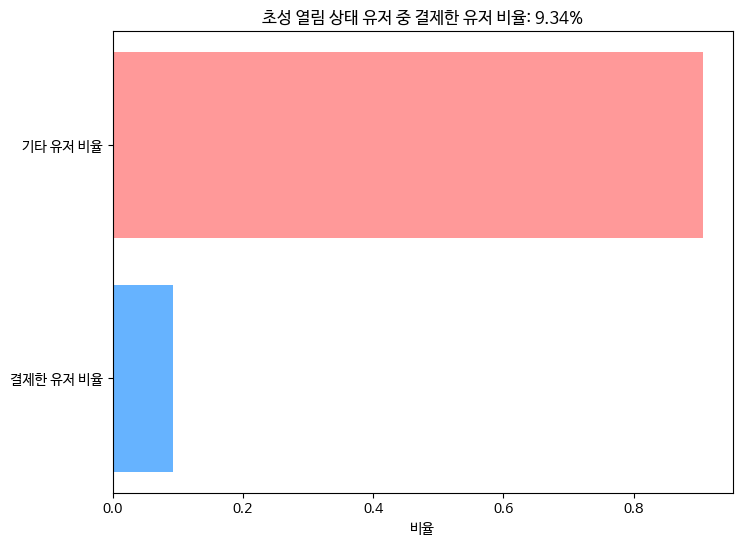

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉúÏù∏ Ïú†Ï†ÄÎì§ ÌïÑÌÑ∞ÎßÅ
open_status_users = accounts_userquestionrecord[accounts_userquestionrecord['status'] == 'I']['chosen_user_id'].unique()

# Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§ Ï∞æÍ∏∞
paid_users = accounts_paymenthistory['user_id'].unique()

# Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉúÏù∏ Ïú†Ï†ÄÎì§ Ï§ë Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§ Ï∞æÍ∏∞
paid_open_users = set(open_status_users) & set(paid_users)

# Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉúÏù∏ Ïú†Ï†ÄÎì§Ïùò Ï†ÑÏ≤¥ Ïàò
total_open_users = len(open_status_users)

# Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§Ïùò Ïàò
paid_open_users_count = len(paid_open_users)

# Í≤∞Ï†úÌïú Ïú†Ï†Ä ÎπÑÏú® Í≥ÑÏÇ∞
paid_open_ratio = paid_open_users_count / total_open_users

# ÏãúÍ∞ÅÌôî: Í∞ÄÎ°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑ
labels = ['Í≤∞Ï†úÌïú Ïú†Ï†Ä ÎπÑÏú®', 'Í∏∞ÌÉÄ Ïú†Ï†Ä ÎπÑÏú®']
values = [paid_open_ratio, 1 - paid_open_ratio]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))  # XÏ∂ï Í∏∏Ïù¥Î•º Í∏∏Í≤å Ï°∞Ï†ï
plt.barh(labels, values, color=colors)
plt.title(f"Ï¥àÏÑ± Ïó¥Î¶º ÏÉÅÌÉú Ïú†Ï†Ä Ï§ë Í≤∞Ï†úÌïú Ïú†Ï†Ä ÎπÑÏú®: {paid_open_ratio * 100:.2f}%")
plt.xlabel('ÎπÑÏú®')
plt.show()
